<a href="https://colab.research.google.com/github/Drishti-17/Road_Accident_Severity_Prediction/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [ ]:
df = pd.read_csv("/content/UK_Accident.csv")

<ipython-input-34-c51d3bf539c5>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/UK_Accident.csv")


In [ ]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1.0,Yes,E01002849,2005.0
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1.0,Yes,E01002909,2005.0
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1.0,Yes,E01002857,2005.0
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1.0,Yes,E01002840,2005.0
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1.0,Yes,E01002863,2005.0


In [ ]:
df.sample(5)

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
107496,107496,2.01E+12,452510.0,312650.0,-1.224222,52.708949,33,2,2,4,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,2.0,Yes,E01025687,2005.0
22636,22636,200501XD80935,518780.0,179850.0,-0.289964,51.505056,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1.0,Yes,E01001231,2005.0
153740,153740,2.01E+12,540840.0,110710.0,0.000595,50.878662,47,3,2,1,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1.0,Yes,E01021036,2005.0
45607,45607,200506M918821,379500.0,385680.0,-2.309557,53.367574,6,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining with high winds,Wet/Damp,None,None,1.0,Yes,E01006136,2005.0
106682,106682,2.01E+12,460480.0,308210.0,-1.107083,52.668209,33,3,2,1,...,non-junction pedestrian crossing,Daylight: Street light present,Fine with high winds,Dry,None,None,1.0,No,E01013734,2005.0


In [ ]:
df.shape

(182428, 33)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [ ]:
df.describe(include="all")

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
count,182428.000000,182428,182377.000000,182428.000000,182377.000000,182428.000000,182428.000000,182428.000000,182428.000000,182428.000000,...,182407,182427,182427,182427,182427,182427,182427.000000,182427,182216,182427.0
unique,NaN,120638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,5,9,6,8,6,NaN,2,30541,NaN
top,NaN,2.01E+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,NaN,Yes,E01000004,NaN
freq,NaN,59577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,155388,132916,146908,126117,177855,178904,NaN,145889,270,NaN
mean,91213.500000,NaN,449059.768721,274108.925713,-1.288529,52.342000,25.708230,2.848559,1.855104,1.364478,...,NaN,NaN,NaN,NaN,NaN,NaN,1.354016,NaN,NaN,2005.0
std,52662.571791,NaN,87272.193220,125283.683719,1.264089,1.429431,19.044679,0.396122,0.722845,0.813519,...,NaN,NaN,NaN,NaN,NaN,NaN,0.478983,NaN,NaN,0.0
min,0.000000,NaN,90680.000000,0.000000,-6.310469,0.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2005.0
25%,45606.750000,NaN,388010.000000,176530.000000,-2.180381,51.475281,6.000000,3.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2005.0
50%,91213.500000,NaN,445010.000000,255505.000000,-1.332936,52.188378,22.000000,3.000000,2.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2005.0
75%,136820.250000,NaN,523860.000000,387400.000000,-0.209431,53.381262,43.000000,3.000000,2.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,2005.0


In [ ]:
df.dtypes

Unnamed: 0                                       int64
Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limi

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182428 entries, 0 to 182427
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Unnamed: 0                                   182428 non-null  int64  
 1   Accident_Index                               182428 non-null  object 
 2   Location_Easting_OSGR                        182377 non-null  float64
 3   Location_Northing_OSGR                       182428 non-null  float64
 4   Longitude                                    182377 non-null  float64
 5   Latitude                                     182428 non-null  float64
 6   Police_Force                                 182428 non-null  int64  
 7   Accident_Severity                            182428 non-null  int64  
 8   Number_of_Vehicles                           182428 non-null  int64  
 9   Number_of_Casualties                         182428 non-nul

convert the 'Date' column to datetime format

In [ ]:
df['Time']= pd.to_datetime(df['Time'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182428 entries, 0 to 182427
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Unnamed: 0                                   182428 non-null  int64         
 1   Accident_Index                               182428 non-null  object        
 2   Location_Easting_OSGR                        182377 non-null  float64       
 3   Location_Northing_OSGR                       182428 non-null  float64       
 4   Longitude                                    182377 non-null  float64       
 5   Latitude                                     182428 non-null  float64       
 6   Police_Force                                 182428 non-null  int64         
 7   Accident_Severity                            182428 non-null  int64         
 8   Number_of_Vehicles                           182428 non-null  in

Checking for duplicated rows

In [ ]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
182423    False
182424    False
182425    False
182426    False
182427    False
Length: 182428, dtype: bool

In [ ]:
df.duplicated().sum()

0

Grouping with respect to our target attribut i.e Accident Severity

In [ ]:
df.groupby('Accident_Severity').size()

Accident_Severity
1      2591
2     22445
3    157392
dtype: int64

This shows that we have 2591 data entry having severity of 1, 22445 entries having severity of 2 and 157392 entries for 3

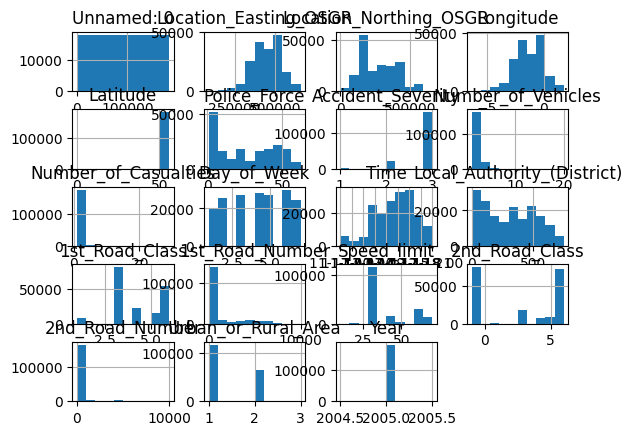

In [ ]:
df.hist()
plt.show()

Checking for NULL entries

# DATA PREPROCESSING

In [ ]:
df.isnull().sum()

Unnamed: 0                                       0
Accident_Index                                   0
Location_Easting_OSGR                           51
Location_Northing_OSGR                           0
Longitude                                       51
Latitude                                         0
Police_Force                                     0
Accident_Severity                                0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                      0
Time                                            15
Local_Authority_(District)                       0
Local_Authority_(Highway)                        0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
Junction_Control               

In [ ]:
df['Number_of_Casualties'].value_counts()

1     138208
2      30582
3       8623
4       3072
5       1150
6        468
7        157
8         61
9         35
10        26
11        12
12         7
14         5
16         4
17         4
13         4
19         3
15         2
23         2
18         1
20         1
29         1
Name: Number_of_Casualties, dtype: int64

In the context of Python and data visualization, "sns" typically refers to Seaborn, which is a popular Python data visualization library. Seaborn is built on top of Matplotlib and provides a high-level interface for creating attractive and informative statistical graphics. It is often used for creating complex and aesthetically pleasing data visualizations with minimal effor

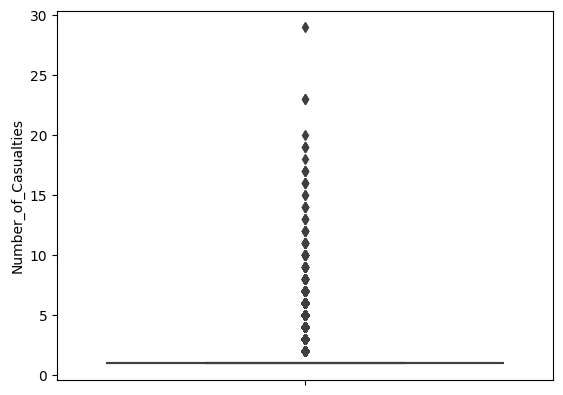

In [ ]:
sns.boxplot(data=df, y='Number_of_Casualties')
plt.show()

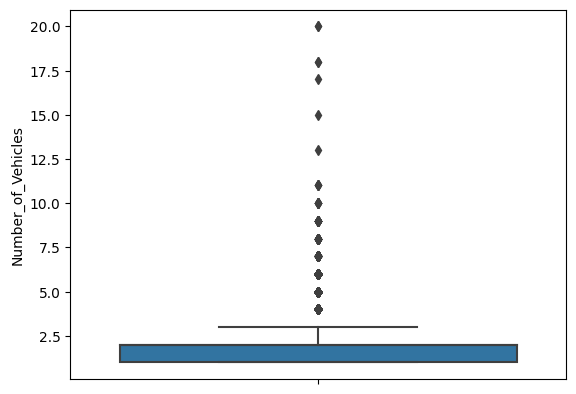

In [ ]:
sns.boxplot(data=df, y='Number_of_Vehicles')
plt.show()

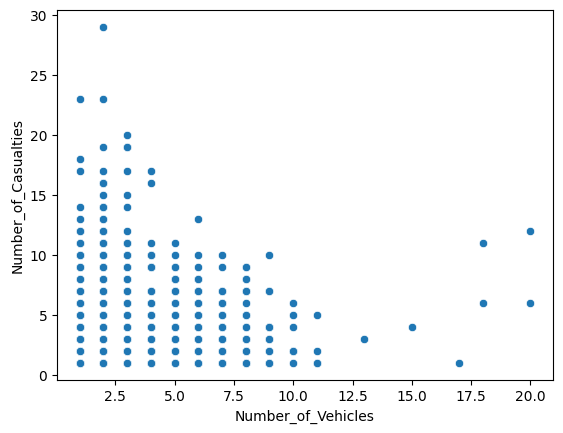

In [ ]:
sns.scatterplot(x=df['Number_of_Vehicles'], y=df['Number_of_Casualties'])
plt.show()

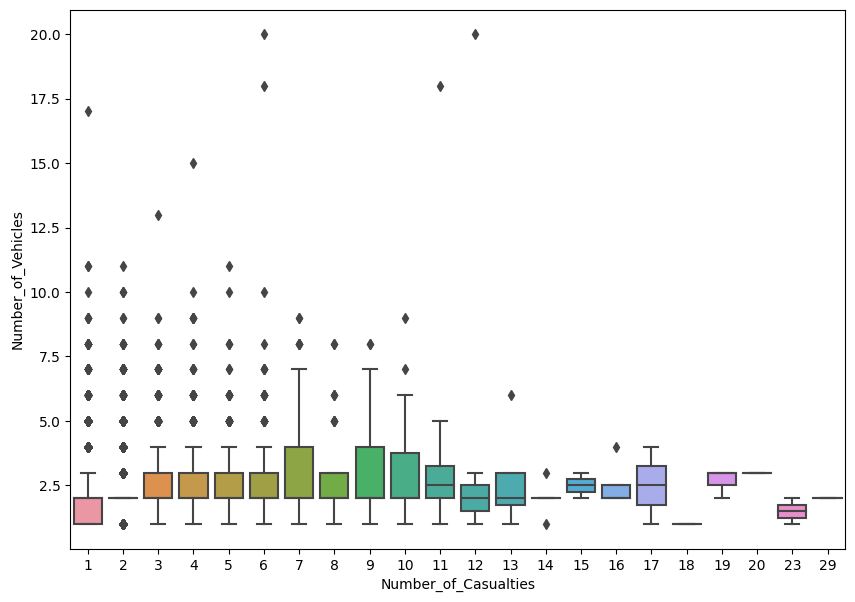

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, y='Number_of_Vehicles', x='Number_of_Casualties')
plt.show()

A heatmap is a graphical representation of data where values within a matrix are represented as colors. It is a way to visualize complex data and quickly identify patterns or trends.

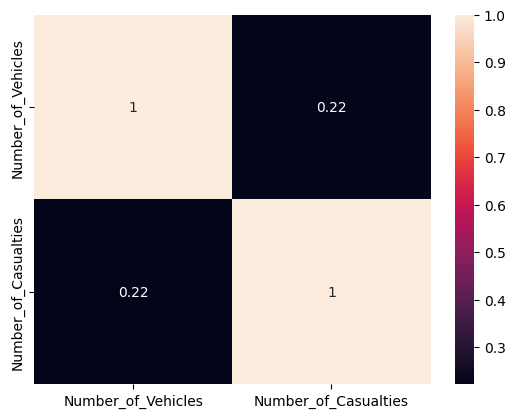

In [ ]:
correlation_matrix = df[['Number_of_Vehicles','Number_of_Casualties']].corr()
#annot adds annotations to the cells of the heatmap with the numeric values of the correlation coefficients.
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In this heatmap, we can find that these are not much extremely correlated variables

Categorical data analysis

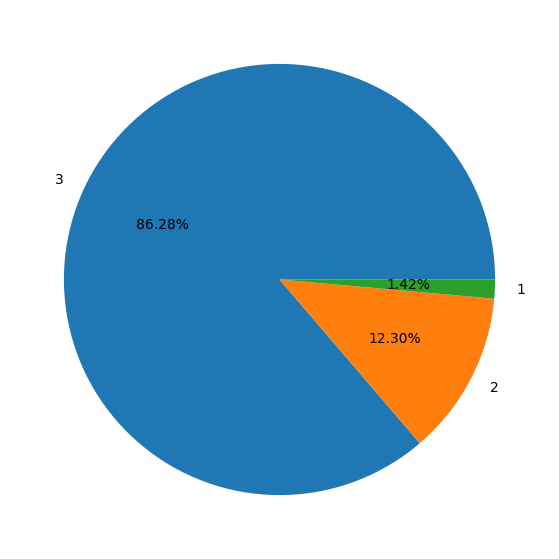

In [ ]:
plt.figure(figsize=(10,7))
plt.pie(x=df['Accident_Severity'].value_counts().values,
        labels=df['Accident_Severity'].value_counts().index,
        autopct='%2.2f%%')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


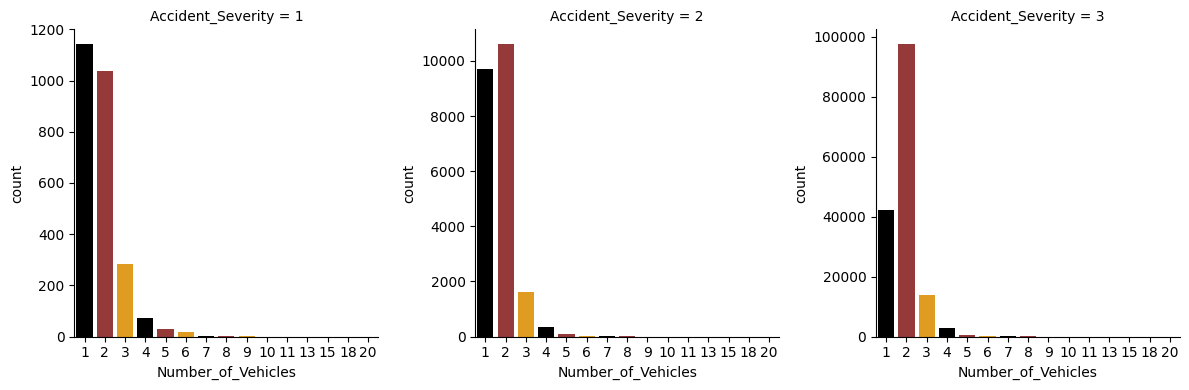

In [ ]:
grid = sns.FacetGrid(data=df, col='Accident_Severity', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'Number_of_Vehicles', palette=['black', 'brown', 'orange'])
plt.show()

<ipython-input-57-ec201ab04140>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

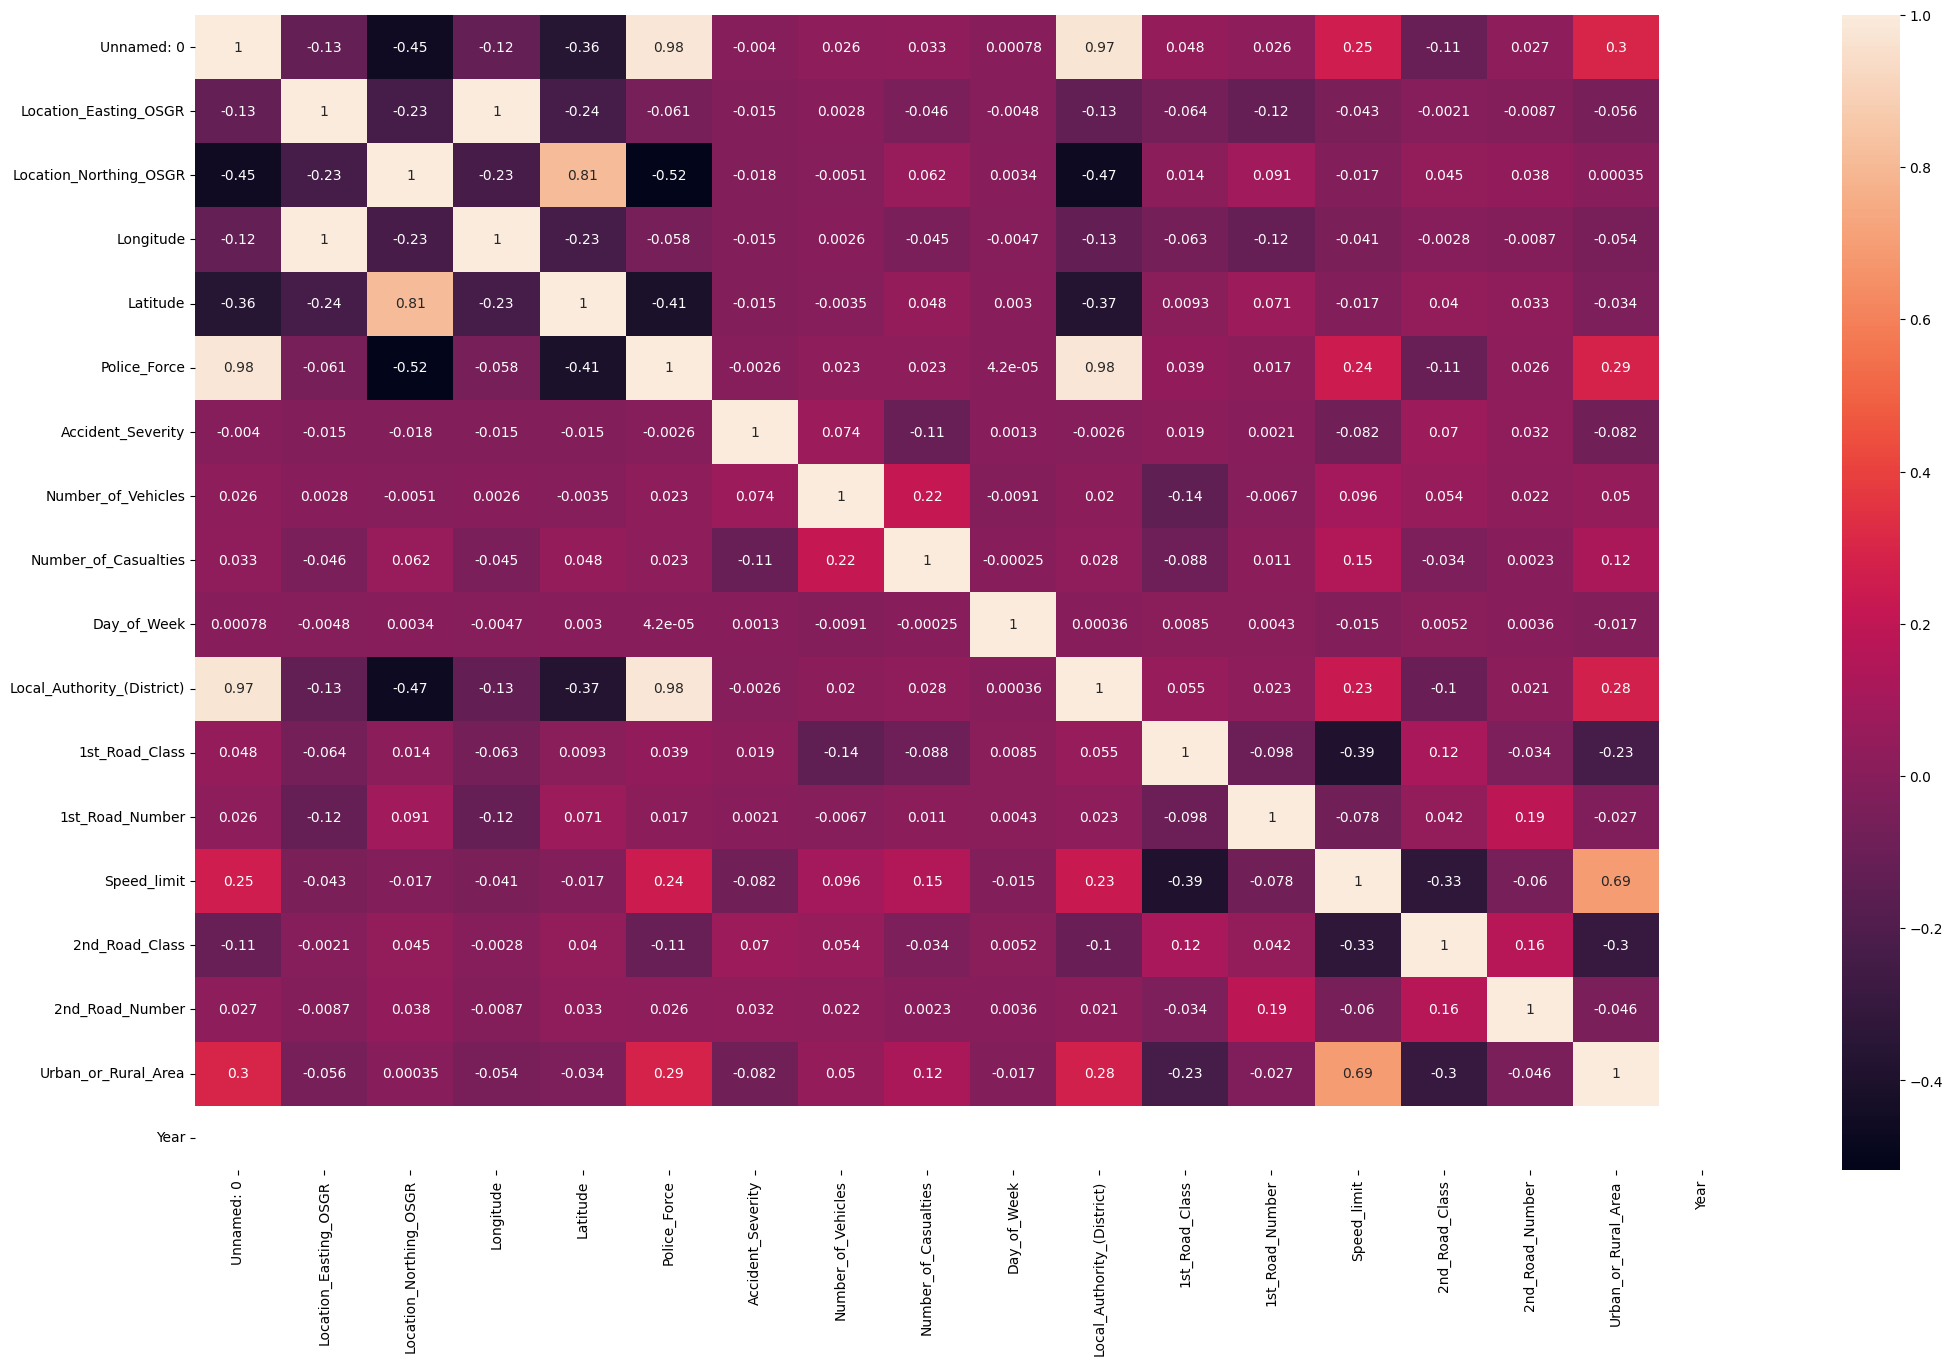

In [ ]:
plt.figure(figsize=[25,15])
sns.heatmap(df.corr(),annot=True)

In [ ]:
df = pd.read_csv("/content/UK_Accident.csv", parse_dates=['Date', 'Time'])

<ipython-input-58-abccd1ca91fb>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv("/content/UK_Accident.csv", parse_dates=['Date', 'Time'])


In [ ]:
df.shape

(189607, 33)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [ ]:
df.drop(columns=['Unnamed: 0', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
                 'Local_Authority_(Highway)', 'LSOA_of_Accident_Location'], inplace=True)

In [ ]:
df.columns


Index(['Accident_Index', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Control', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Year'],
      dtype='object')

In [ ]:
df.sample(5)

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
78617,200520D349803,-1.812711,52.505559,20,3,2,1,2005-11-21,2,2023-11-17 07:25:00,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Other,Frost/Ice,None,None,1.0,Yes,2005.0
142107,2005445DW0047,-1.677493,50.790327,44,3,1,1,2005-02-19,7,2023-11-17 07:00:00,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Other,Wet/Damp,None,None,2.0,Yes,2005.0
106320,2.01E+12,-1.183868,52.642511,33,3,2,1,2005-04-14,5,2023-11-17 18:00:00,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Other,Dry,None,None,1.0,Yes,2005.0
161670,200550D21J009,-3.545889,50.731425,50,3,2,1,2005-07-13,4,2023-11-17 17:53:00,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,2.0,Yes,2005.0
15376,200501RG40388,0.086702,51.489156,1,3,1,1,2005-05-21,7,2023-11-17 17:46:00,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1.0,Yes,2005.0


#Data Exploration and Cleaning

In [ ]:
print("No. of rows: {}".format(df.shape[0]))
print("No. of cols: {}".format(df.shape[1]))

No. of rows: 189607
No. of cols: 28


In [ ]:
df.isna().any()

Accident_Index                                 False
Longitude                                       True
Latitude                                       False
Police_Force                                   False
Accident_Severity                              False
Number_of_Vehicles                             False
Number_of_Casualties                           False
Date                                           False
Day_of_Week                                    False
Time                                            True
Local_Authority_(District)                     False
1st_Road_Class                                  True
1st_Road_Number                                 True
Road_Type                                       True
Speed_limit                                     True
Junction_Control                                True
2nd_Road_Class                                  True
2nd_Road_Number                                 True
Pedestrian_Crossing-Human_Control             

calculate the percentage of missing (NaN or null) values for each column in a Pandas DataFrame

In [ ]:
df.isnull().sum() / len(df) * 100

Accident_Index                                 0.000000
Longitude                                      0.029007
Latitude                                       0.000000
Police_Force                                   0.000000
Accident_Severity                              0.000000
Number_of_Vehicles                             0.000000
Number_of_Casualties                           0.000000
Date                                           0.000000
Day_of_Week                                    0.000000
Time                                           0.009493
Local_Authority_(District)                     0.000000
1st_Road_Class                                 0.000527
1st_Road_Number                                0.000527
Road_Type                                      0.000527
Speed_limit                                    0.000527
Junction_Control                               0.000527
2nd_Road_Class                                 0.000527
2nd_Road_Number                                0

Hence we can analyse that null values are very less as compared to the number of rows present in the data, so we can drop the rows

In [ ]:
df.dropna(subset=['Longitude', 'Time', 'Pedestrian_Crossing-Human_Control',
                  'Pedestrian_Crossing-Physical_Facilities'], inplace=True)

In [ ]:
dup_rows = df[df.duplicated()]
print("No. of duplicate rows: ", dup_rows.shape[0])

No. of duplicate rows:  3


The total number of the duplicated rows are 3 hence we can drop these rows

In [ ]:
df.drop_duplicates(inplace=True)
print("No. of rows remaining: ", df.shape[0])

No. of rows remaining:  189501


In [ ]:
df.describe(include=np.number)

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,189501.000000,189501.000000,189501.000000,189501.000000,189501.000000,189501.000000,189501.000000,189501.000000,189501.000000,189501.000000,189501.000000,189501.000000,189501.000000,189501.000000,189501.0
mean,-1.369806,52.448383,27.781373,2.845922,1.850655,1.365908,4.125920,328.407322,4.106459,1007.184748,39.741637,2.627844,387.548461,1.363961,2005.0
std,1.316164,1.298146,21.598779,0.399427,0.724783,0.815917,1.926602,231.623489,1.447575,1831.822866,14.464651,3.213724,1315.324506,0.481358,0.0
min,-7.369061,49.914701,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,10.000000,-1.000000,-1.000000,1.000000,2005.0
25%,-2.245267,51.483783,6.000000,3.000000,1.000000,1.000000,2.000000,110.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2005.0
50%,-1.401041,52.224048,23.000000,3.000000,2.000000,1.000000,4.000000,306.000000,4.000000,113.000000,30.000000,3.000000,0.000000,1.000000,2005.0
75%,-0.230509,53.404131,44.000000,3.000000,2.000000,1.000000,6.000000,501.000000,6.000000,671.000000,60.000000,6.000000,0.000000,2.000000,2005.0
max,1.758337,60.586586,95.000000,3.000000,20.000000,29.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2005.0


In [ ]:
df.describe(include=np.object)

<ipython-input-71-f5c37ff7ec99>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=np.object)


,Accident_Index,Road_Type,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident
count,189501,189501,189501,189501,189501,189501,189501,189501,189501,189501,189501
unique,123111,6,5,3,6,5,9,6,8,6,2
top,2.01E+12,Single carriageway,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,Yes
freq,66380,140993,91586,188510,161824,137807,152110,130194,184679,185740,152369


Count: The number of non-missing (non-null) values in the column.


Unique: The number of unique (distinct) values in the column.


Top: The most frequently occurring value in the column.


Freq: The frequency (count) of the top value.

In [ ]:
numerical_data = df.select_dtypes(include='number')
num_cols = numerical_data.columns
len(num_cols)

15

In [ ]:
categorical_data = df.select_dtypes(include='object')
cat_cols = categorical_data.columns
len(cat_cols)

11

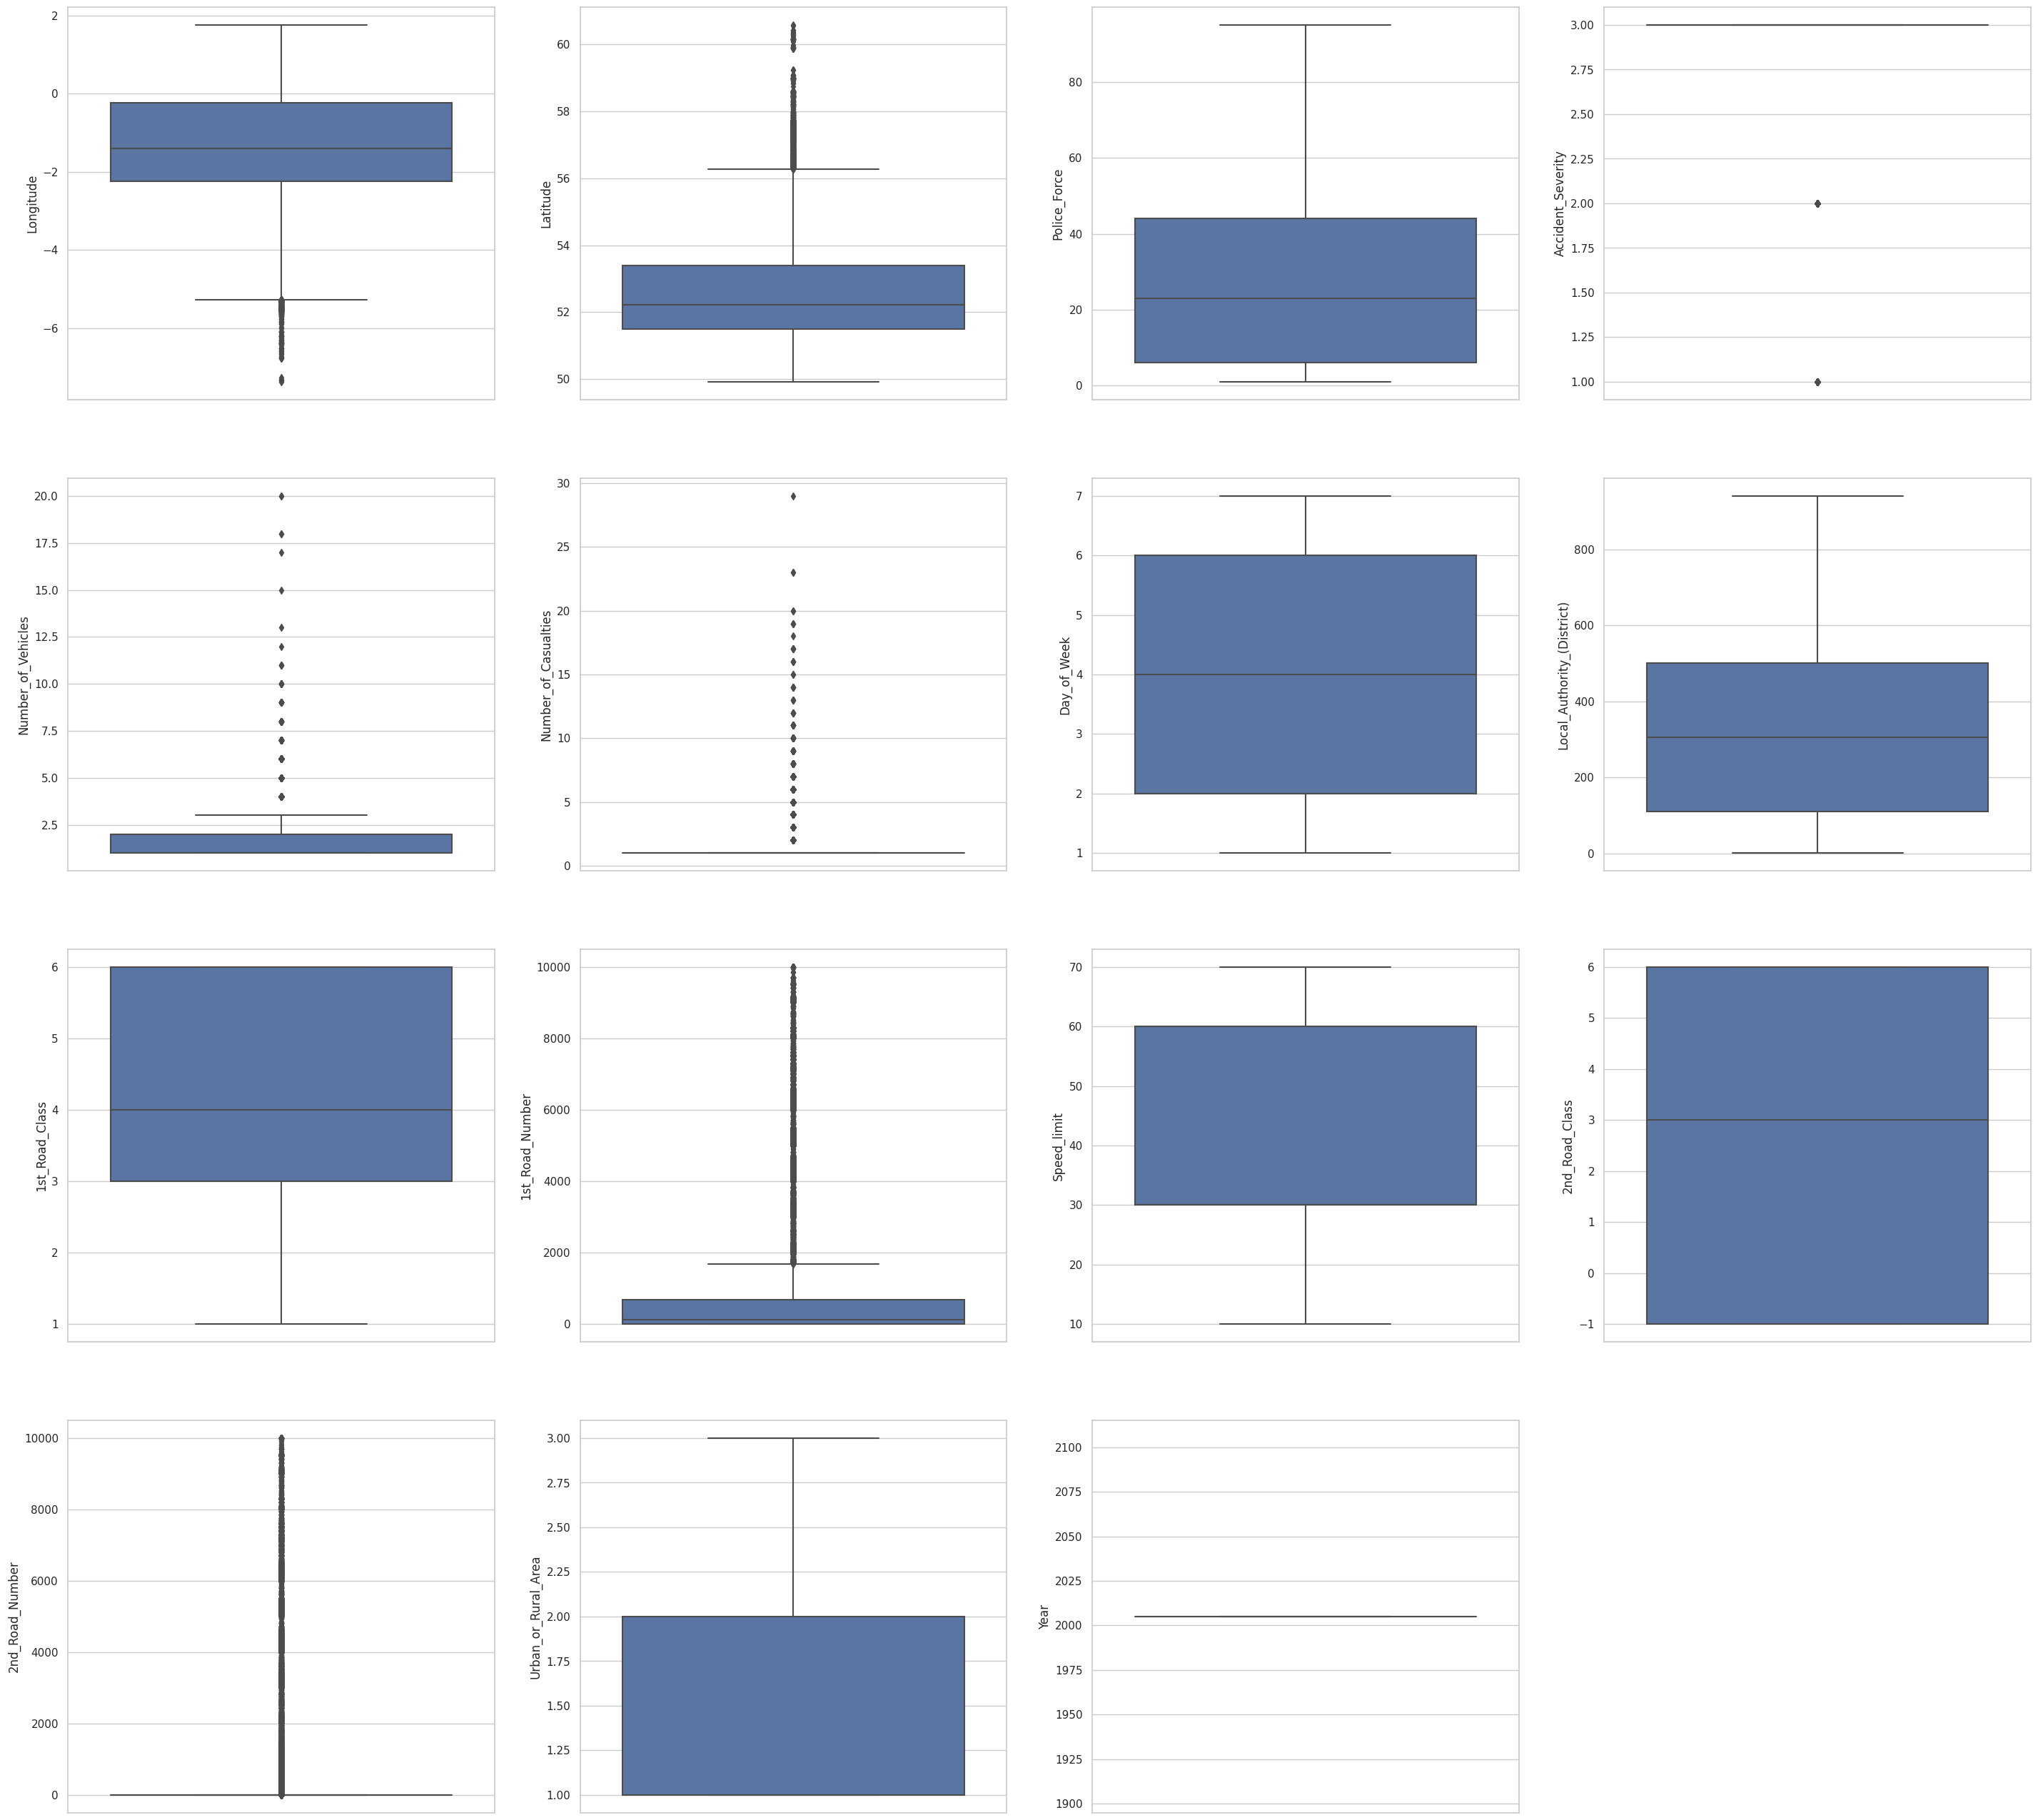

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


In [ ]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(20, 50))
fig.subplots_adjust(right=1.5)

for plot in range(1, len(num_cols)+1):
    plt.subplot(6, 4, plot)
    sns.boxplot(y=df[num_cols[plot-1]])

plt.show()
%time

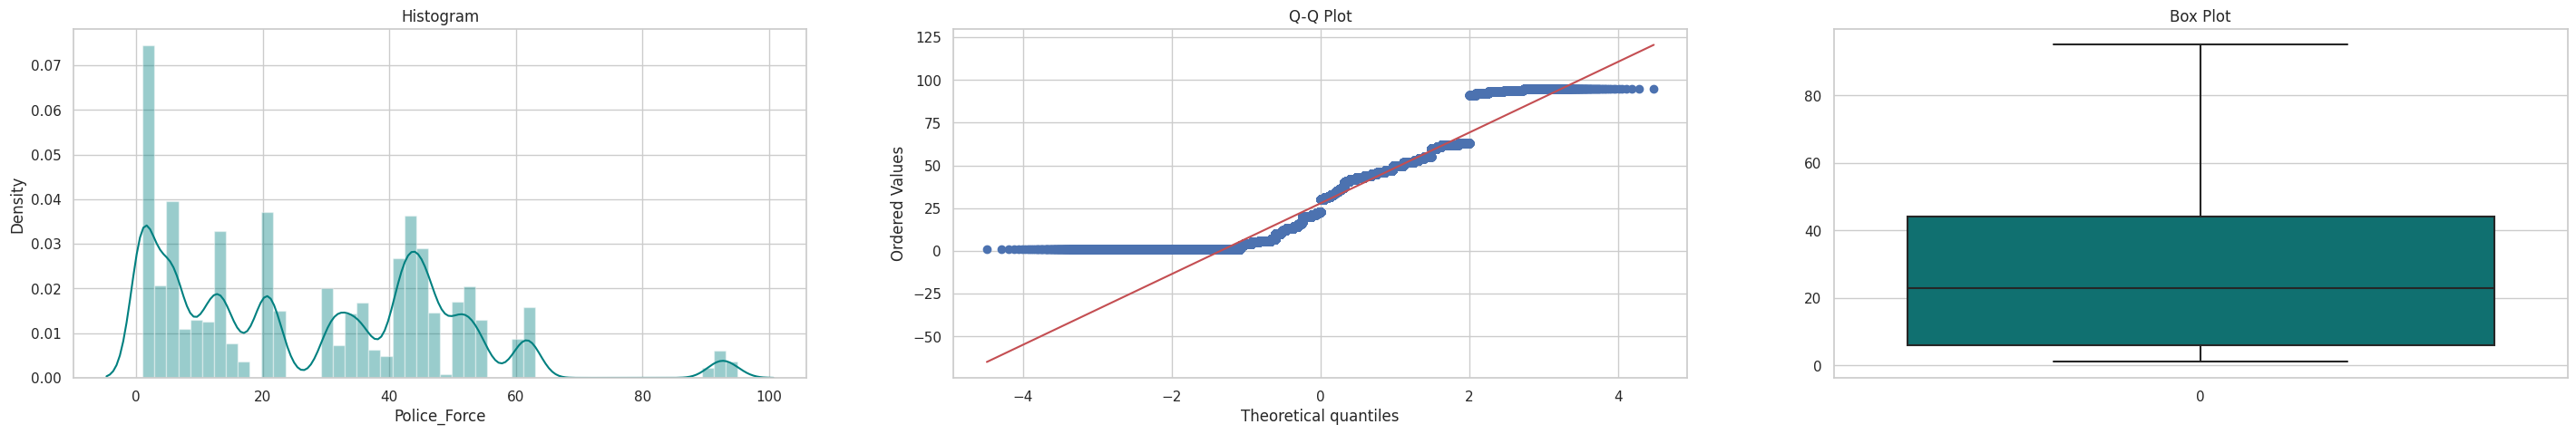

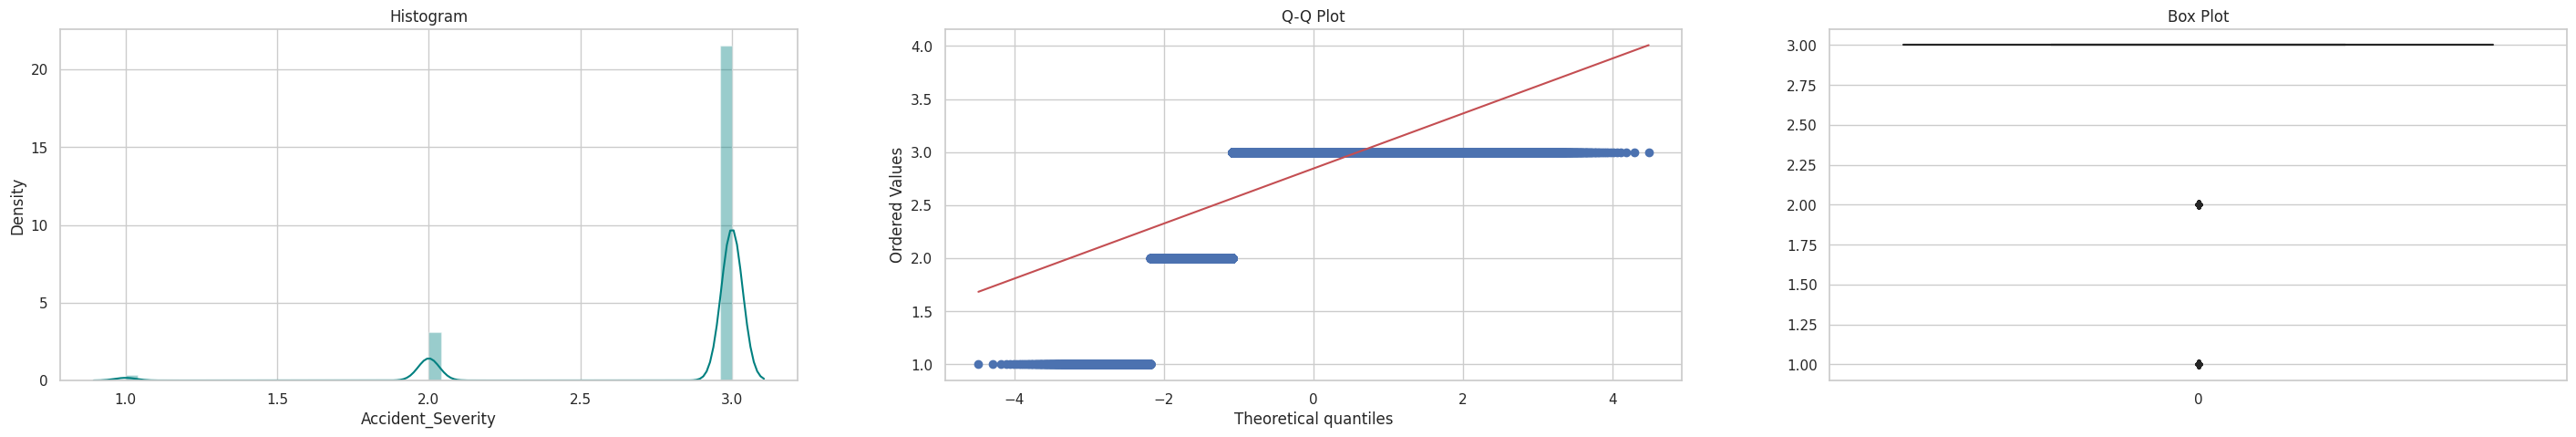

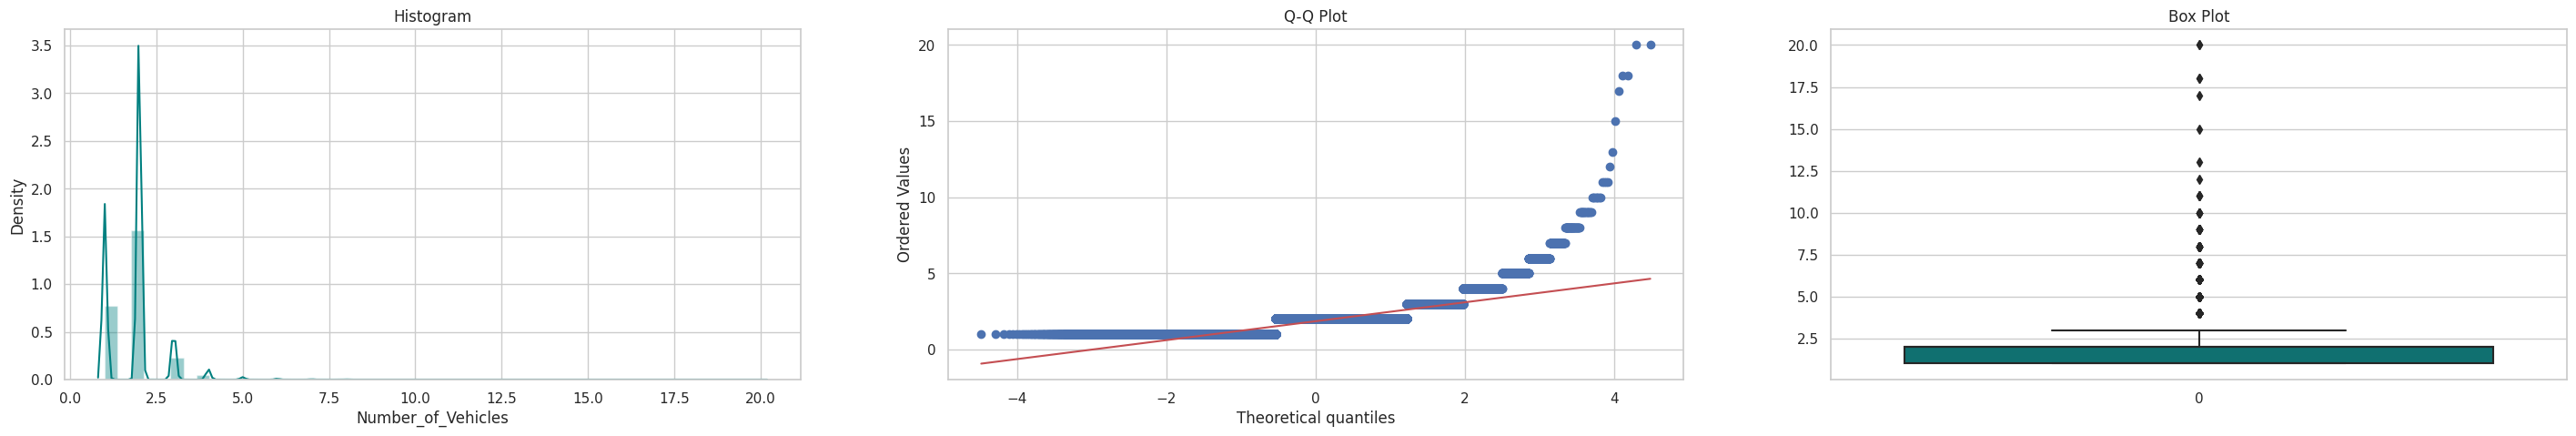

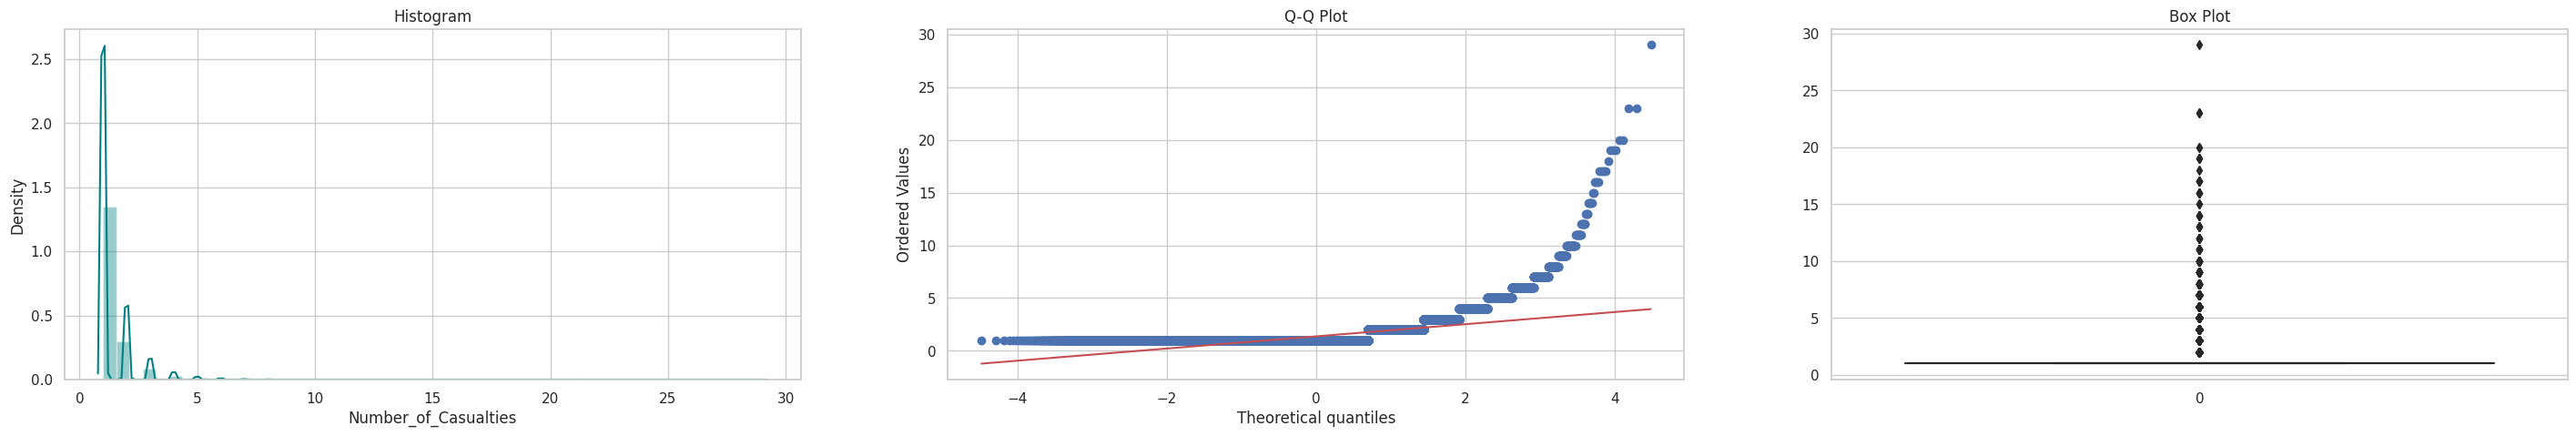

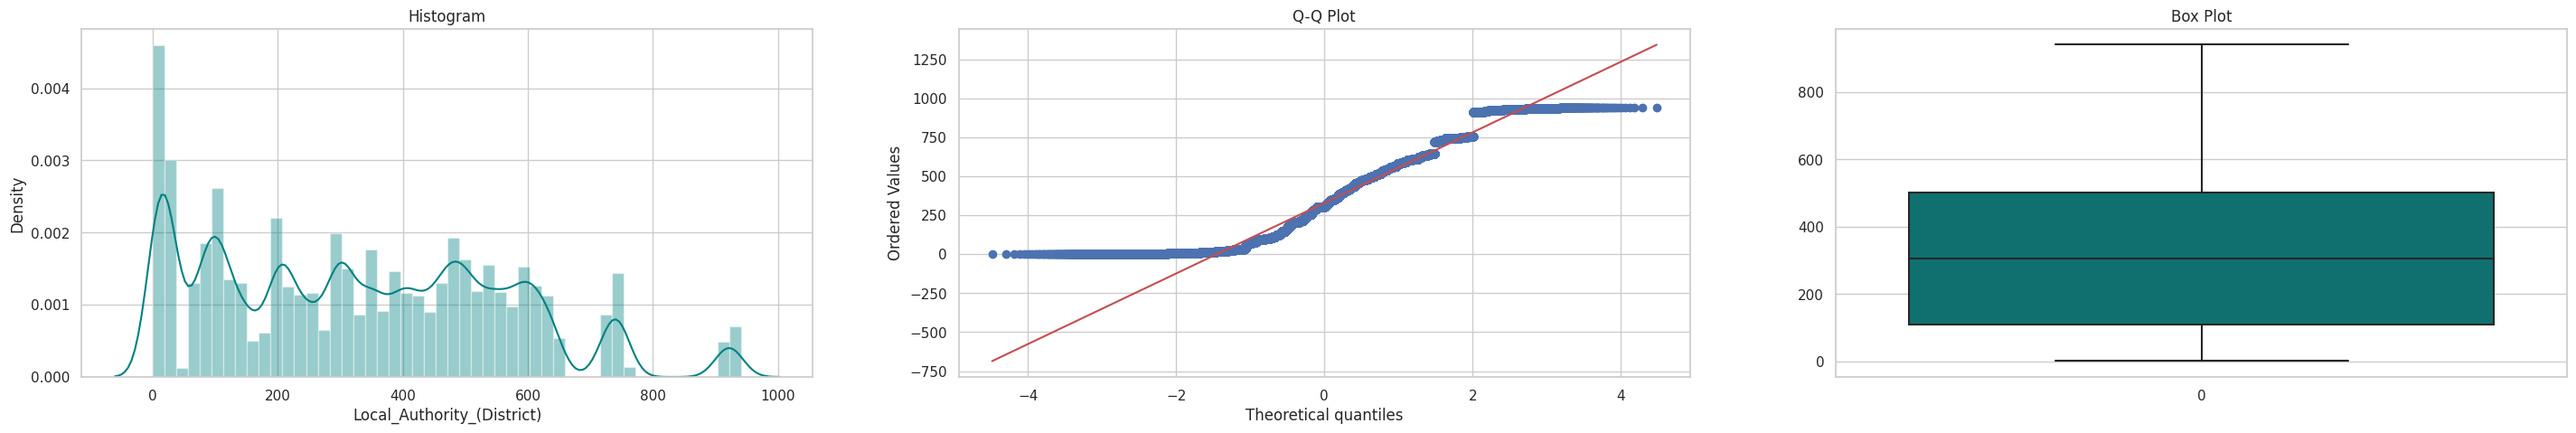

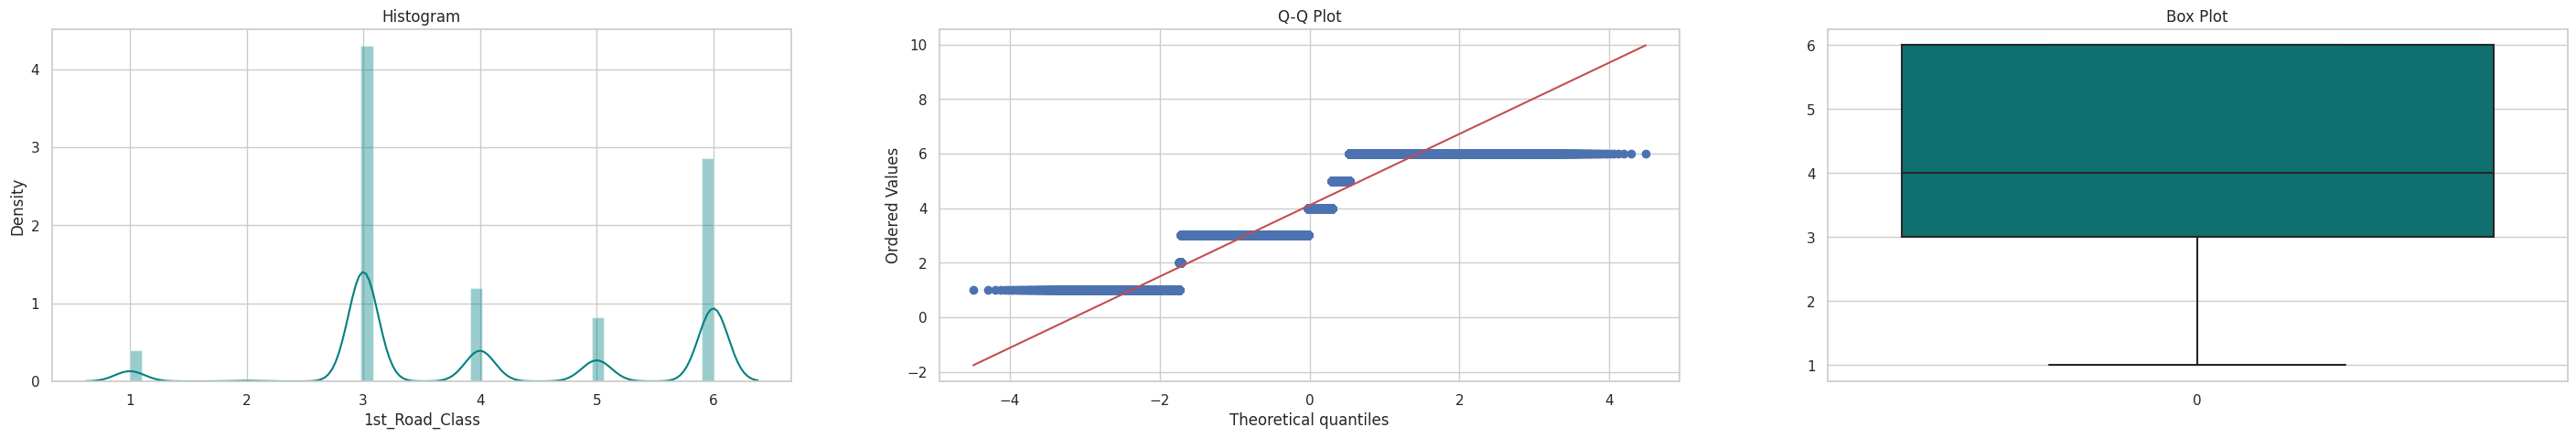

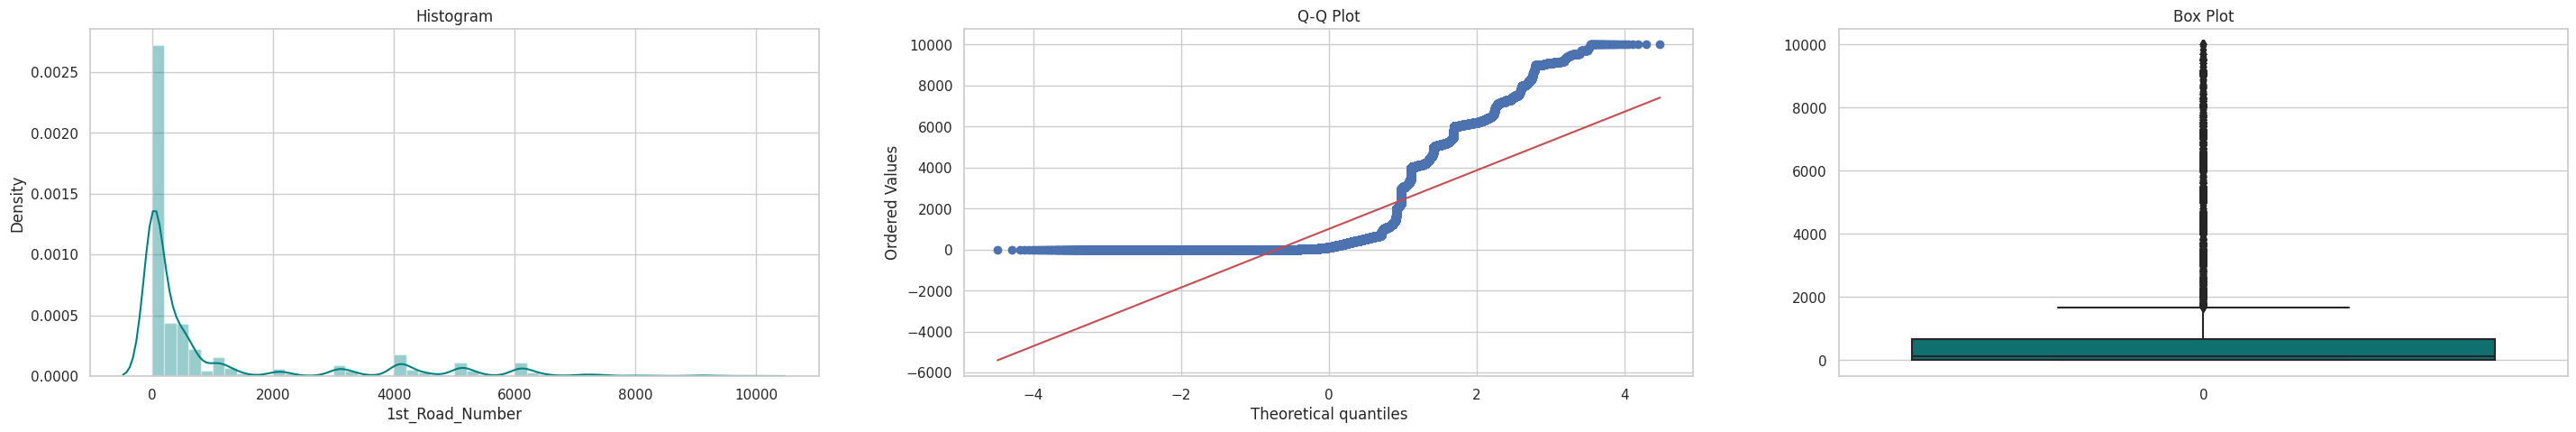

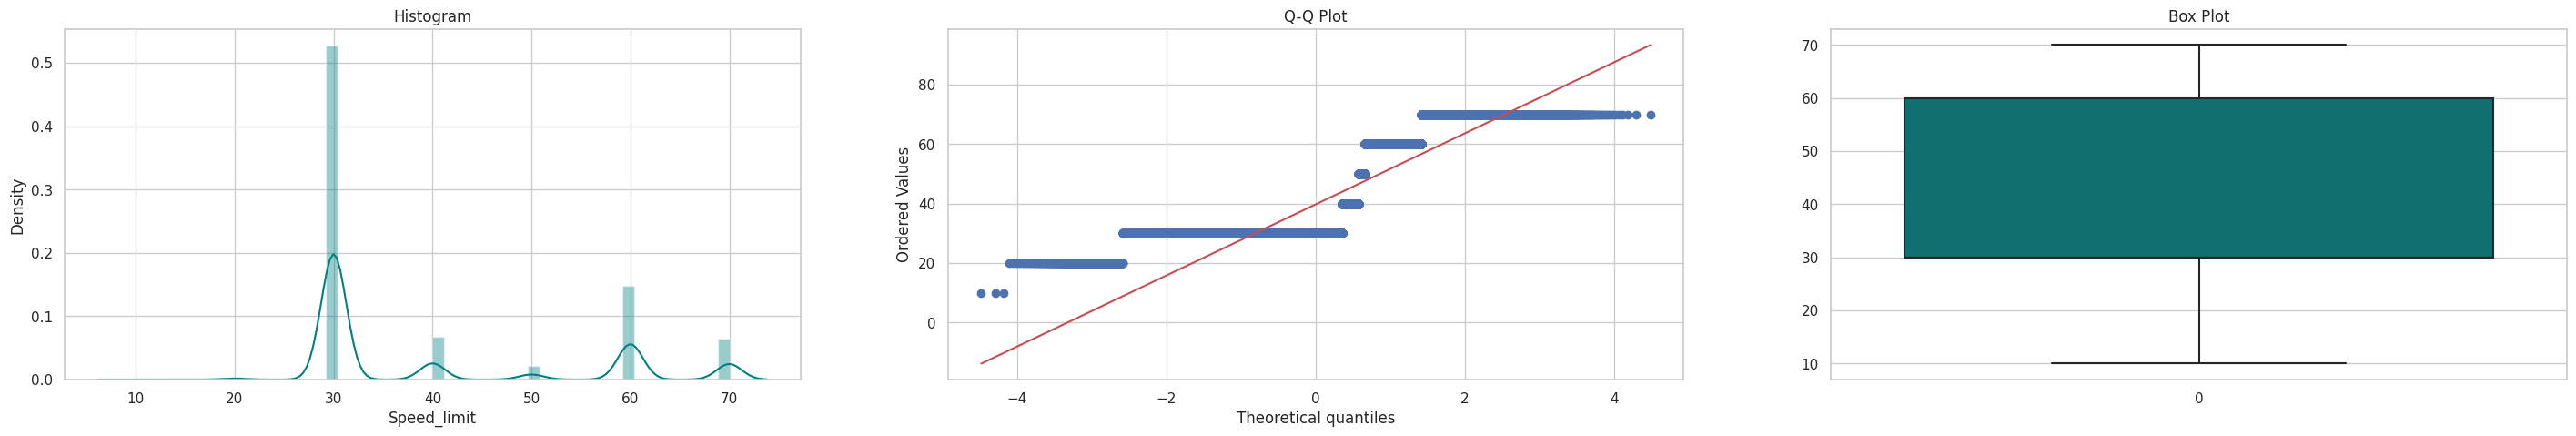

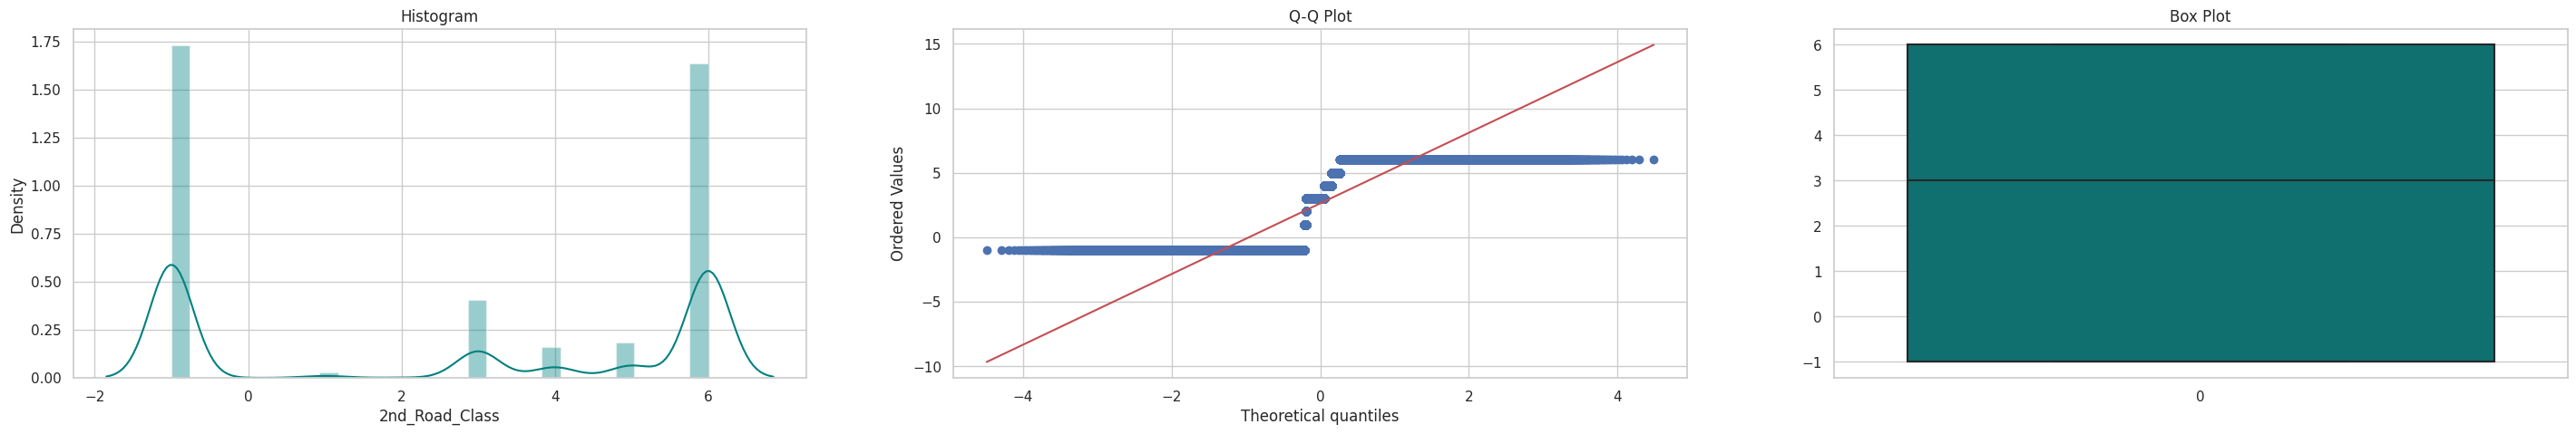

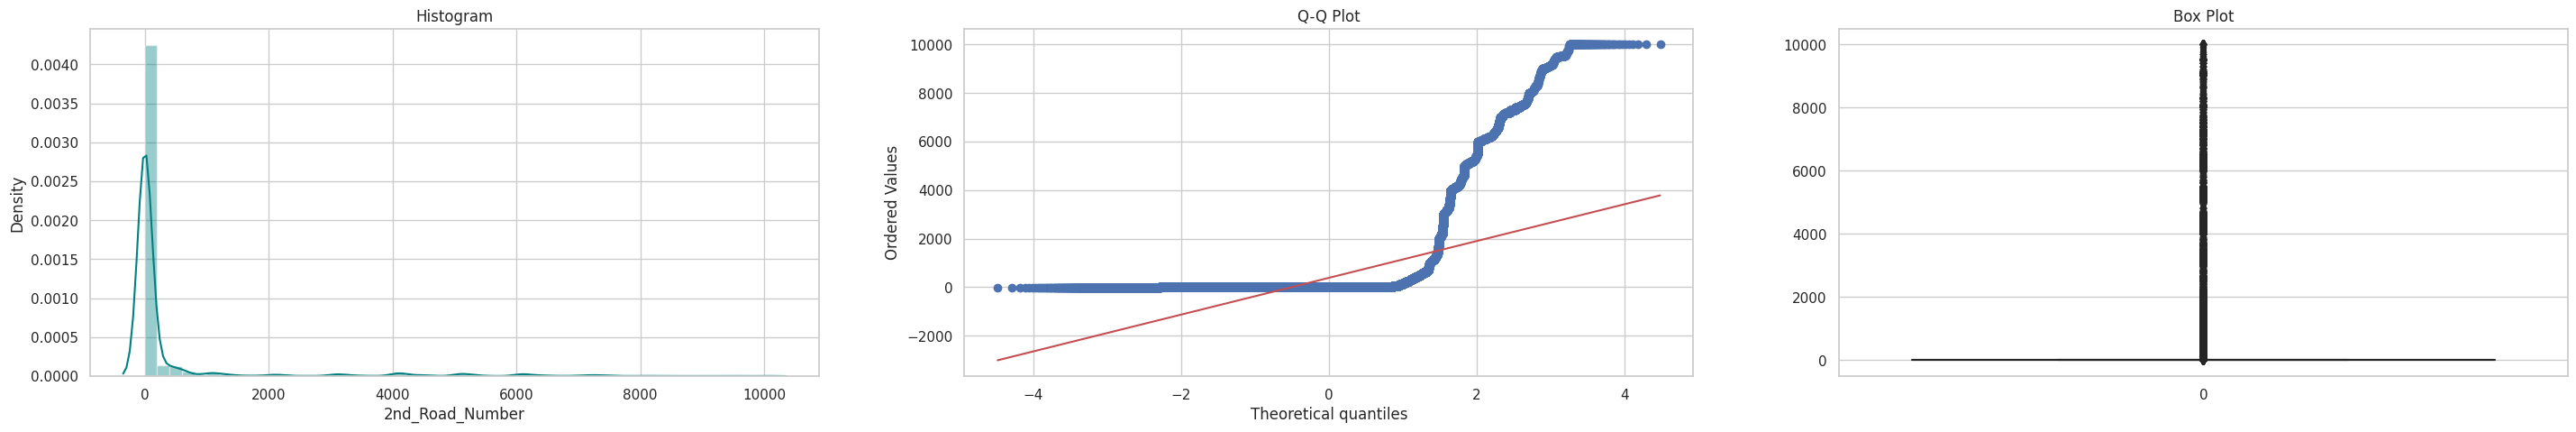

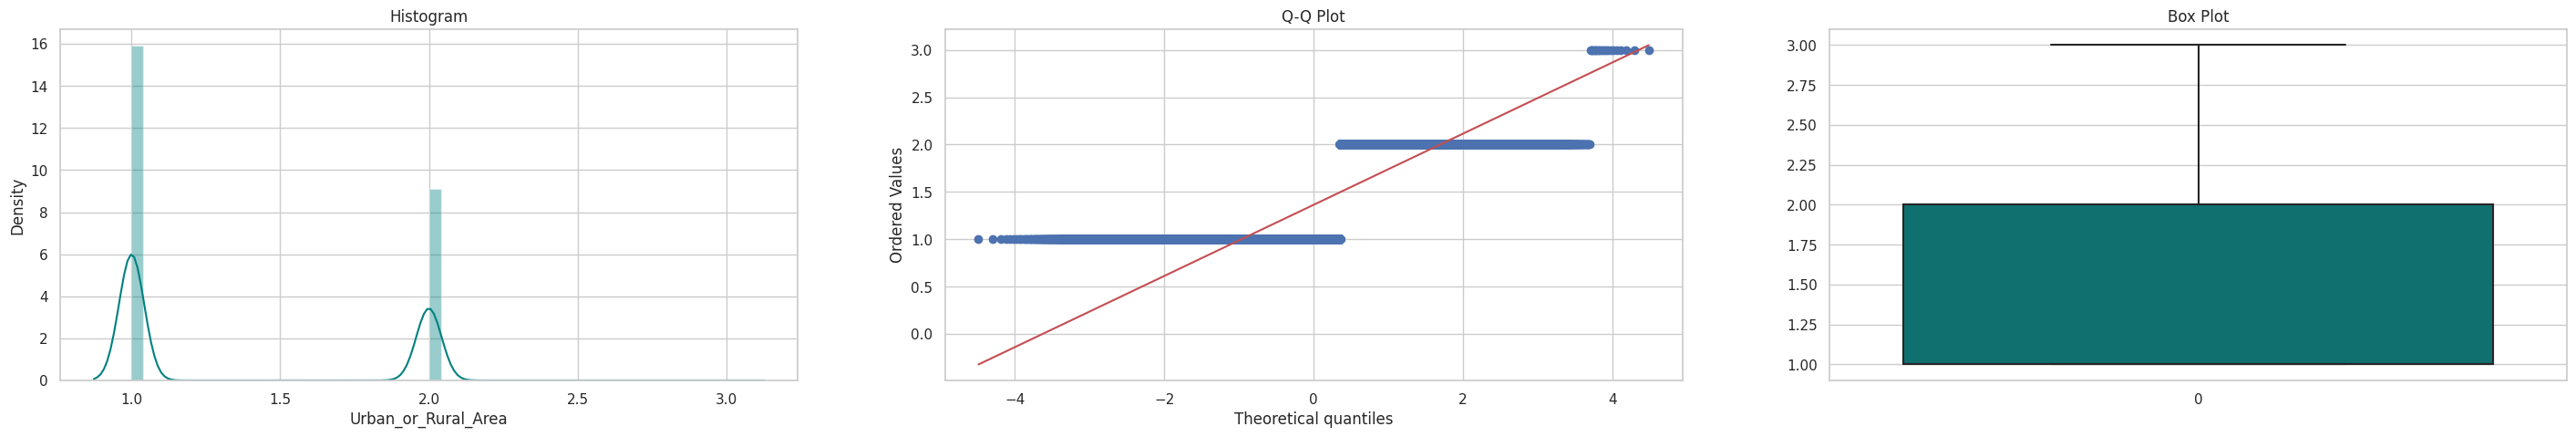

In [ ]:
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

def diagnostic_plot(data, col):
    fig = plt.figure(figsize=(20, 5))
    fig.subplots_adjust(right=1.5)

    plt.subplot(1, 3, 1)
    sns.distplot(data[col], kde=True, color='teal')
    plt.title('Histogram')

#The dist='norm' argument specifies that a theoretical normal distribution is used as a reference.
#The fit=True argument fits a linear regression line to the Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(data[col], dist='norm', fit=True, plot=plt)
    plt.title('Q-Q Plot')

    plt.subplot(1, 3, 3)
    sns.boxplot(data[col],color='teal')
    plt.title('Box Plot')

    plt.show()

dist_lst = ['Police_Force', 'Accident_Severity',
            'Number_of_Vehicles', 'Number_of_Casualties',
            'Local_Authority_(District)', '1st_Road_Class', '1st_Road_Number',
            'Speed_limit', '2nd_Road_Class', '2nd_Road_Number',
            'Urban_or_Rural_Area']

for col in dist_lst:
    diagnostic_plot(df, col)

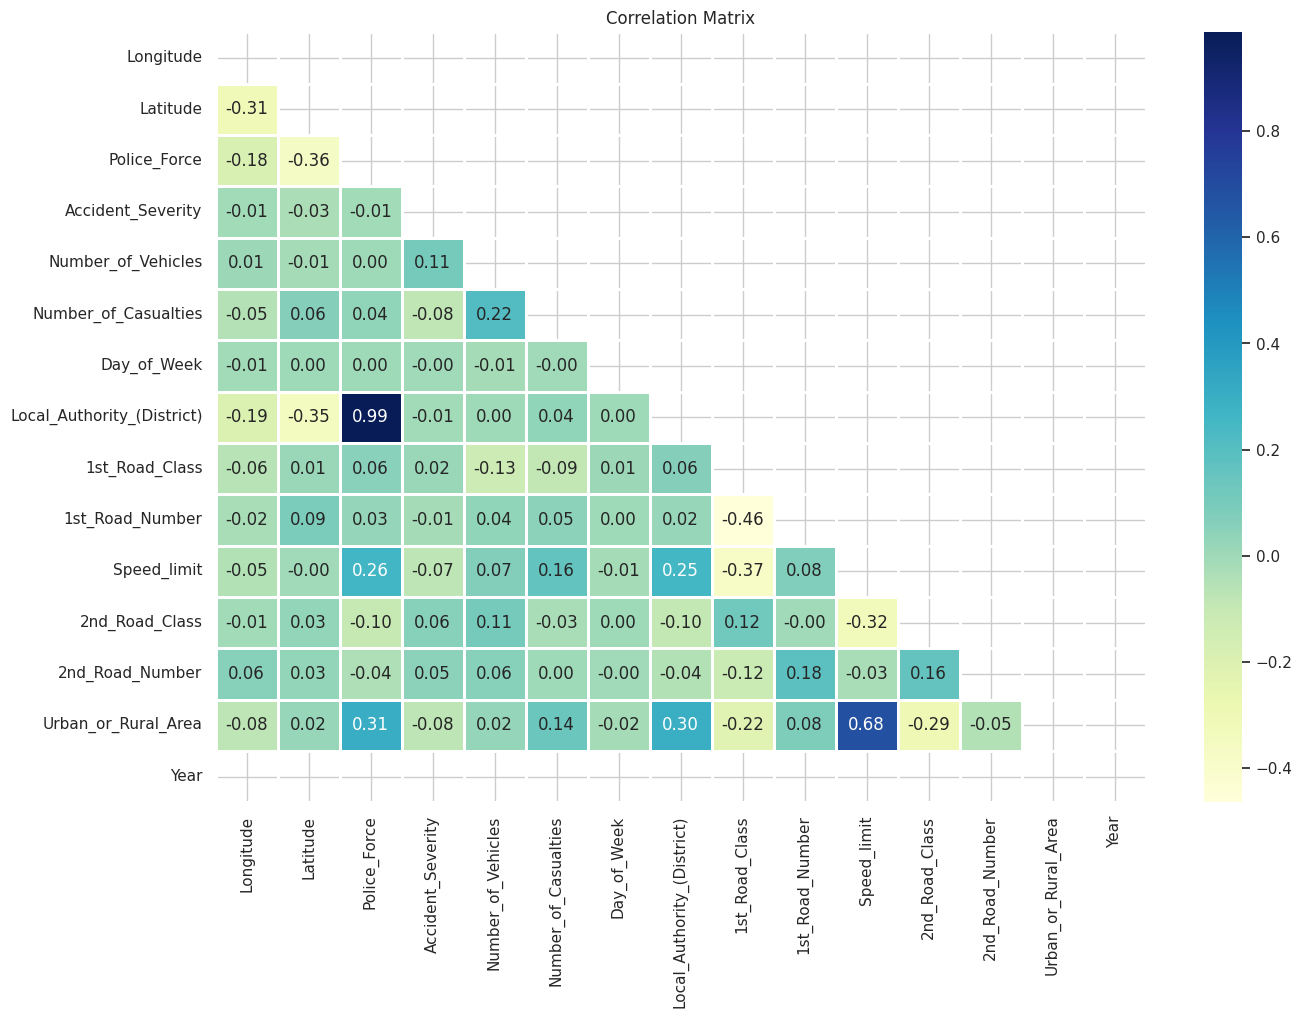

In [ ]:
plt.figure(figsize = (15,10))
corr = df.corr(method='spearman')

#triu is a NumPy function that stands for "triangular upper."
mask = np.triu(np.ones_like(corr, dtype=bool))

#The mask parameter is likely used to mask the upper or lower triangle of the heatmap.
#This can be useful if you want to hide redundant information, as the correlation matrix is symmetric,
#and the diagonal is filled with ones (perfect self-correlation).

cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

As from the correlation matrix the columns with high corelation can be obtained

In [ ]:
def get_corr(data, threshold):
    corr_col = set()
    cormat = data.corr()
    for i in range(len(cormat.columns)):
        for j in range(i):
            if abs(cormat.iloc[i, j])>threshold:
                col_name = cormat.columns[i]
                corr_col.add(col_name)
    return corr_col

corr_features = get_corr(df, 0.80)
print(corr_features)

{'Local_Authority_(District)'}


This is only one column with corelation more than 80% hence we can drop this column.

In [ ]:
df.drop(columns=['Local_Authority_(District)'],
        axis=1, inplace=True)

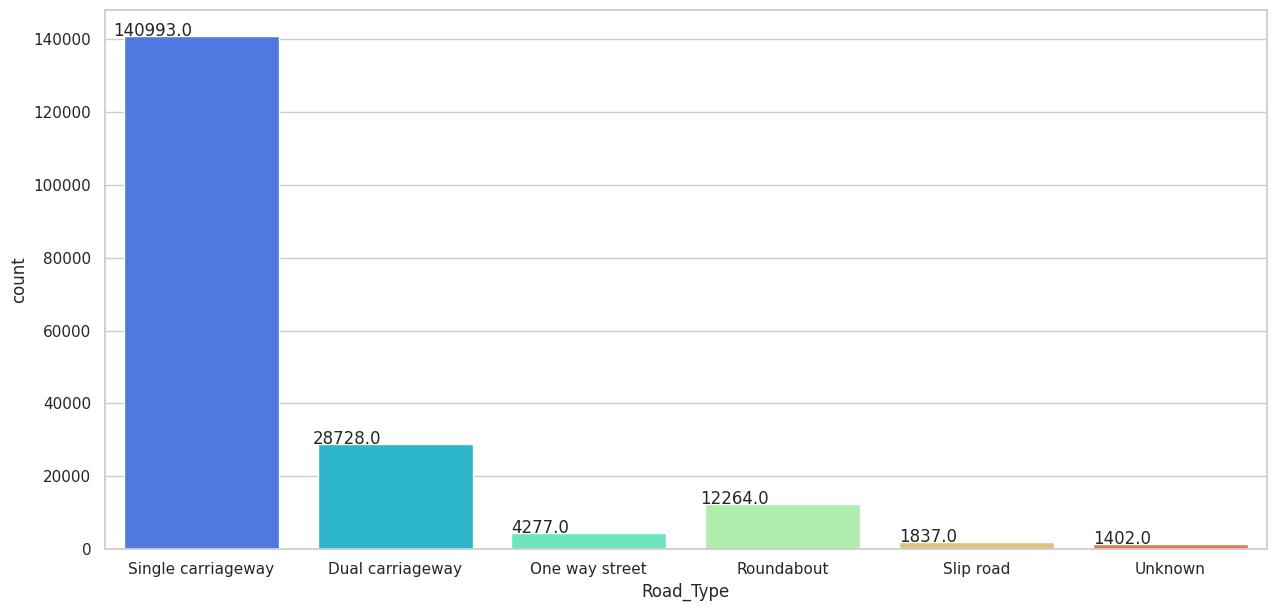

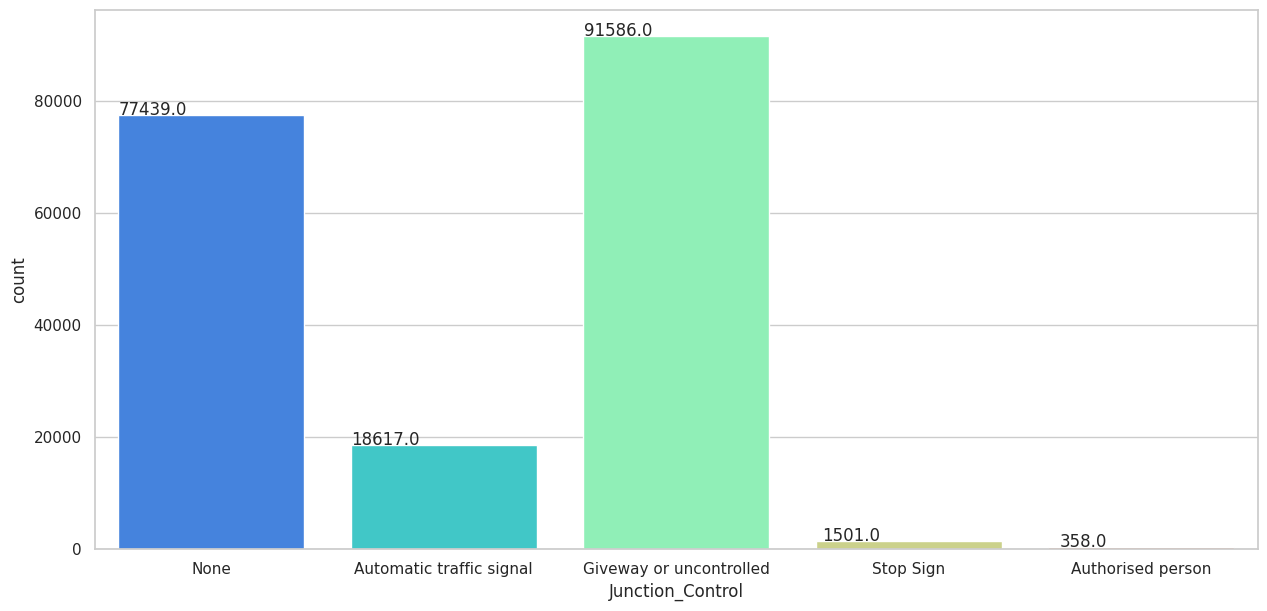

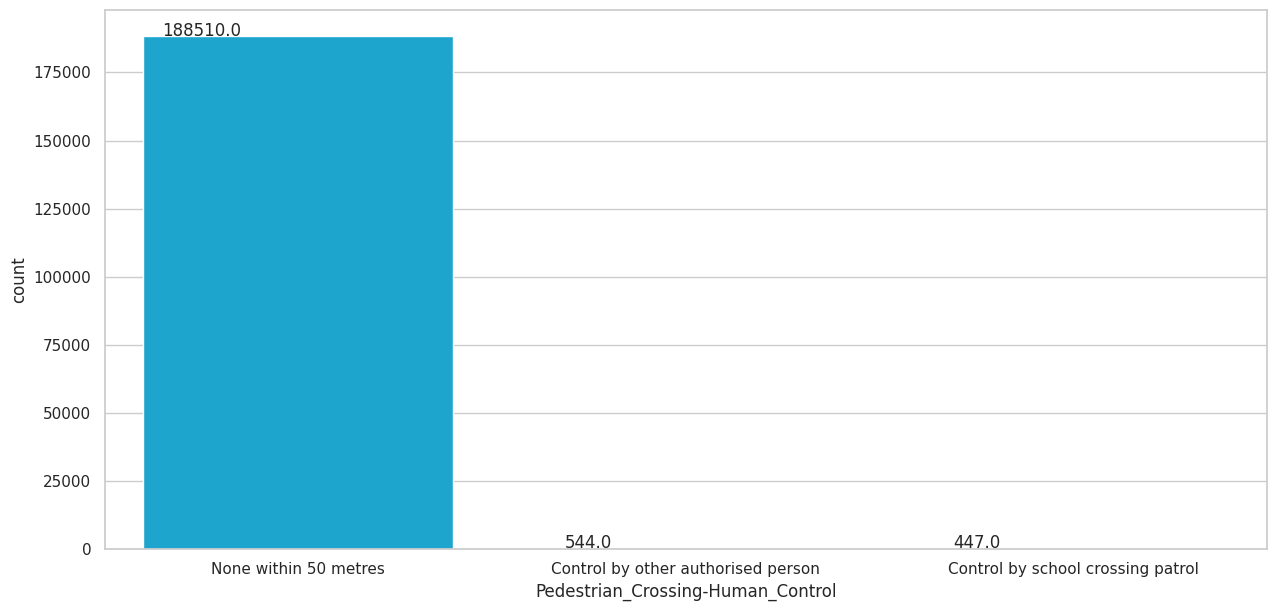

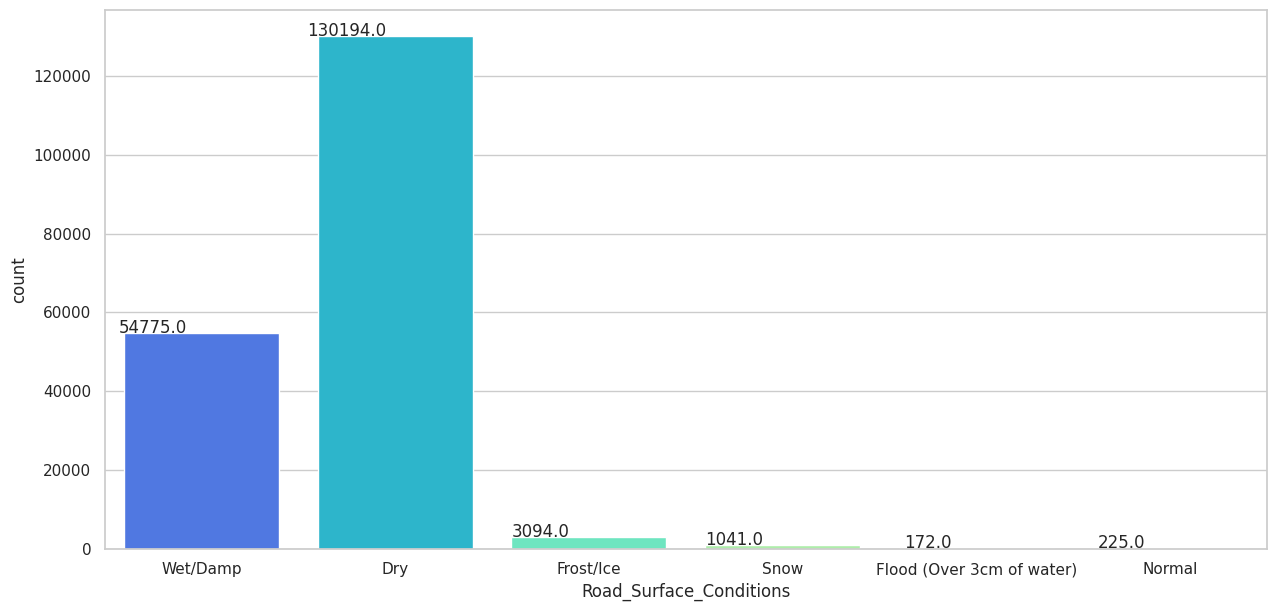

In [ ]:
def cnt_plot(data, col):

  plt.figure(figsize=(15, 7))
  ax1 = sns.countplot(x=col, data=data,palette='rainbow')

  for p in ax1.patches:
    ax1.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1), ha='center')

  plt.show()

  print('\n')

cnt_lst1 = ['Road_Type', 'Junction_Control',
           'Pedestrian_Crossing-Human_Control',
           'Road_Surface_Conditions']

for col in cnt_lst1:
  cnt_plot(df, col)

In most of the accidents,

The road was single carriageway.

The junction was either uncontrolled junction or there wasn't any junction at all.

There were no human controlled pedestrian crossing within 50 metres of the spot.

The weather was dry.

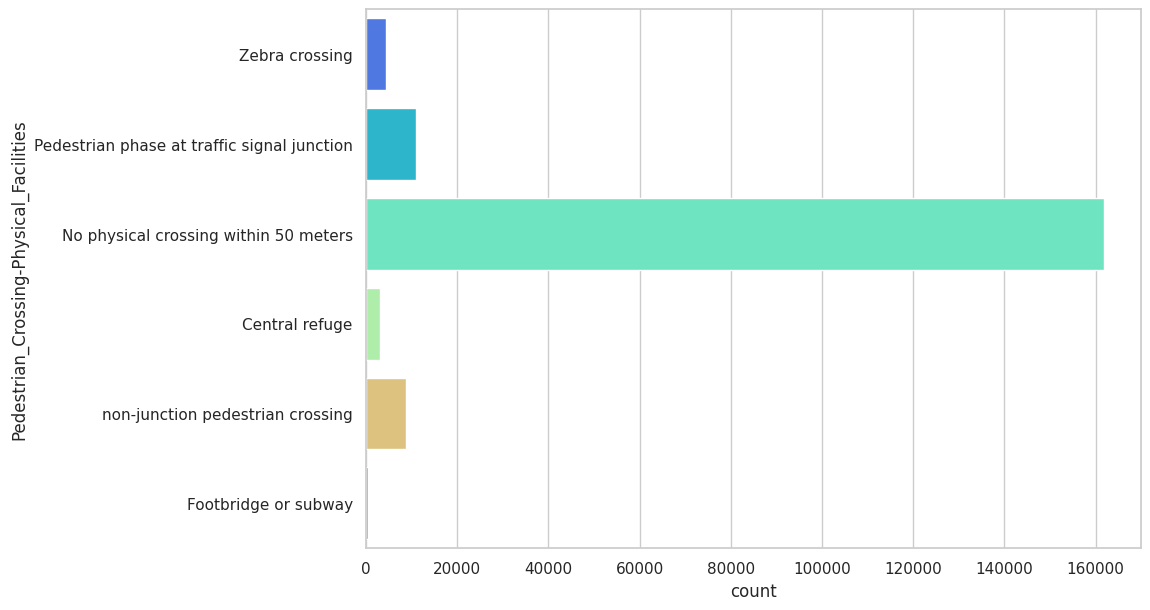

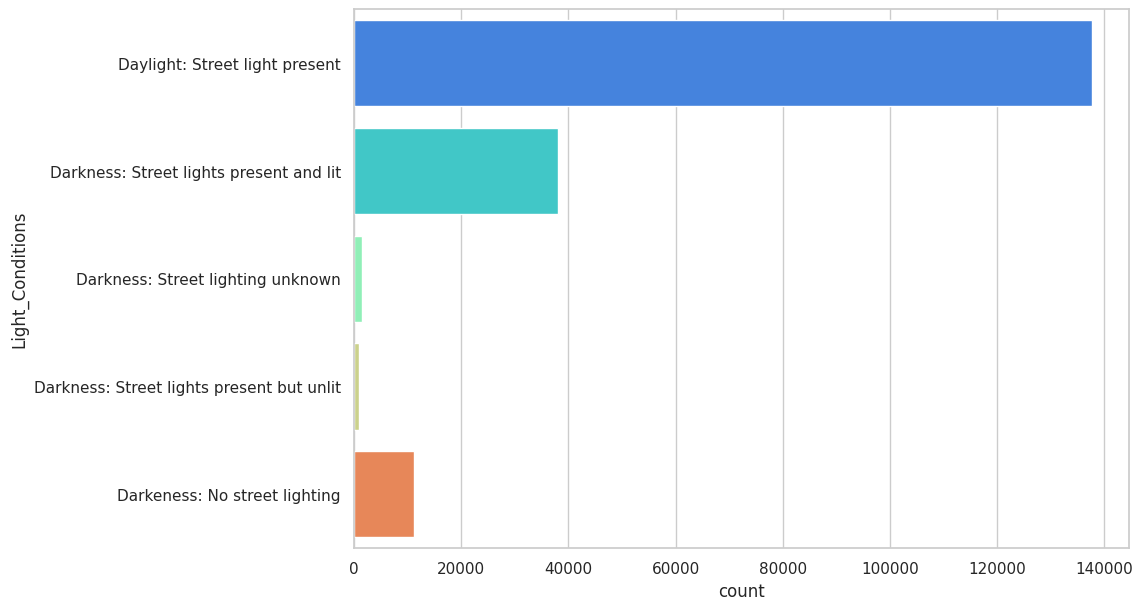

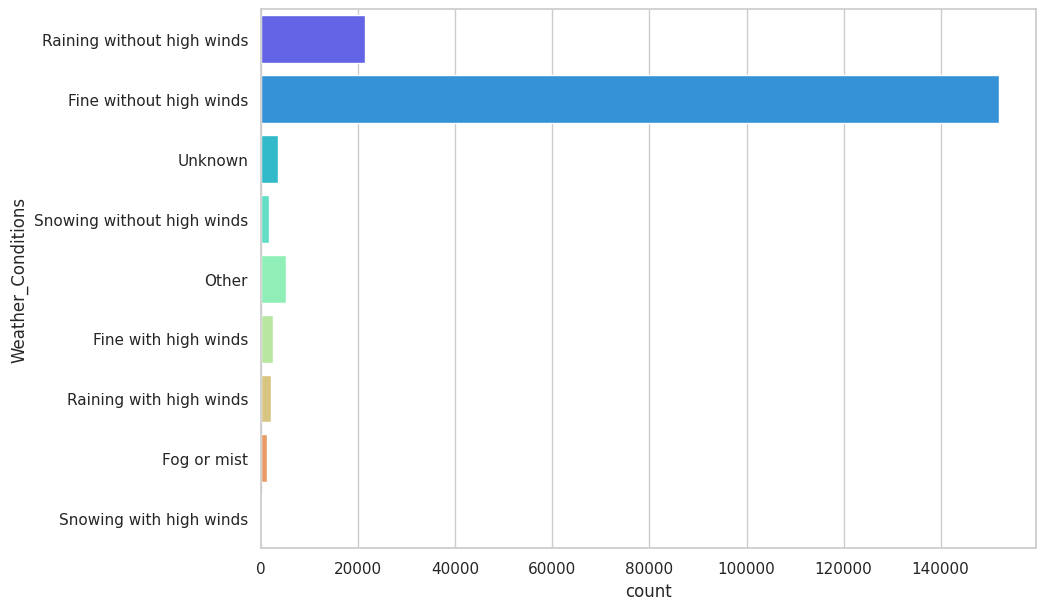

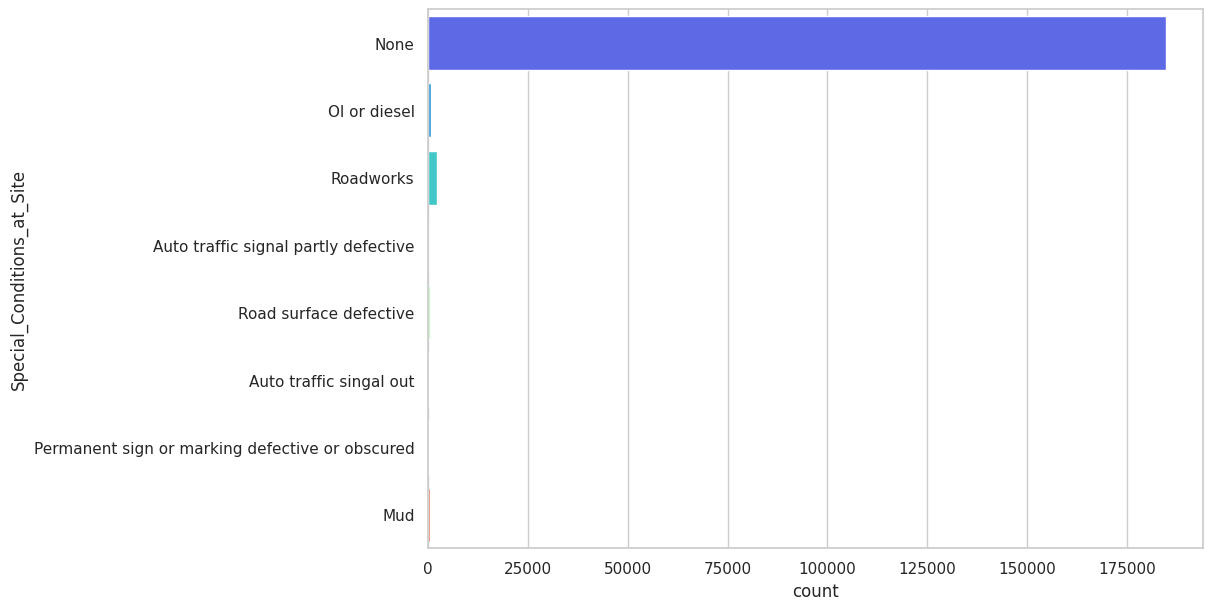

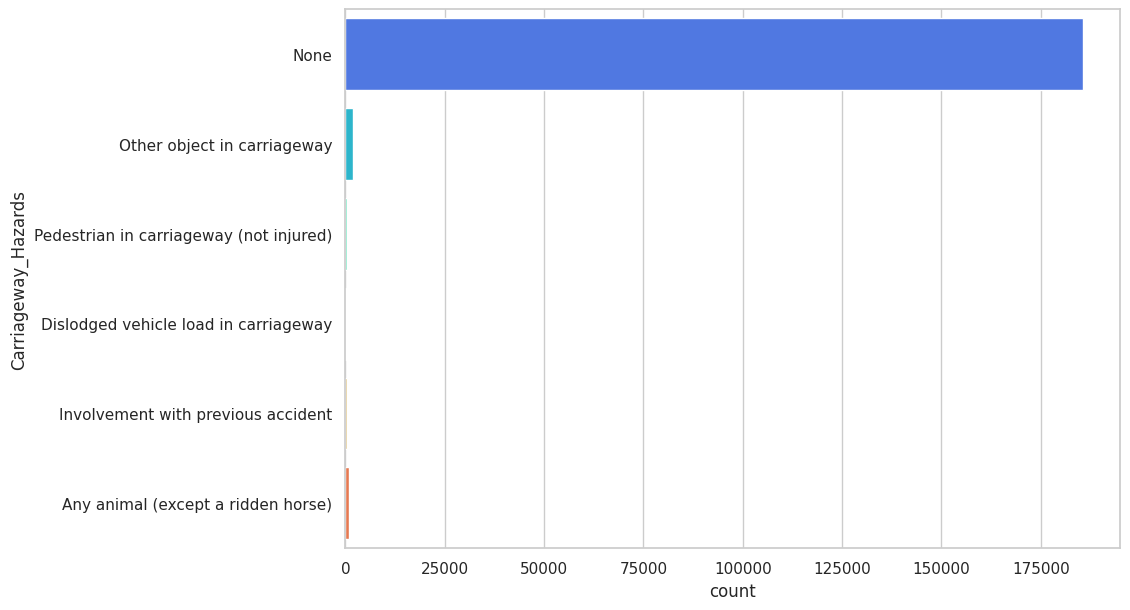

In [ ]:
def cnt_plot(data, col):

  plt.figure(figsize=(10, 7))
  sns.countplot(y=col, data=data,palette='rainbow')
  plt.show()

  print('\n')

cnt_lst2 = ['Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
            'Weather_Conditions',
            'Special_Conditions_at_Site', 'Carriageway_Hazards']

for col in cnt_lst2:
  cnt_plot(df, col)

In most of the accidents,

There was no physical crossing within 50 metres of the spot.

Happened in daylight so the visibility was fine.

The weather was fine without high winds.

There wasn't any special condition or any problem with the carriageway

In [ ]:
df.sample(5)

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
106618,2.01E+12,-1.184459,52.666339,33,3,2,1,2005-05-16,2,2023-11-17 14:40:00,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,2.0,No,2005.0
71118,200514C140205,-1.362314,53.396654,14,3,5,7,2005-02-09,6,2023-11-17 17:28:00,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1.0,Yes,2005.0
128316,200542G025403,0.092076,51.753899,42,3,1,1,2005-07-03,2,2023-11-17 10:30:00,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Roadworks,None,1.0,No,2005.0
88135,2.01E+12,-2.030889,52.691076,21,3,2,1,2005-11-03,6,2023-11-17 10:30:00,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1.0,No,2005.0
69246,200514A142305,-1.165430,53.543578,14,3,2,3,2005-06-18,7,2023-11-17 13:00:00,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1.0,No,2005.0


In [ ]:
df['Urban_or_Rural_Area'].value_counts()

1.0    120550
2.0     68931
3.0        20
Name: Urban_or_Rural_Area, dtype: int64

In [ ]:
df['Urban_or_Rural_Area'].replace(3, 1, inplace=True)

In [ ]:
df['Urban_or_Rural_Area'].value_counts()

1.0    120570
2.0     68931
Name: Urban_or_Rural_Area, dtype: int64

In [ ]:
df['Accident_Severity'].value_counts()

3    163070
2     23664
1      2767
Name: Accident_Severity, dtype: int64

In [ ]:
df['Number_of_Vehicles'].value_counts()[:10]

2     112739
1      55800
3      16383
4       3386
5        782
6        250
7         83
8         40
9         18
10         8
Name: Number_of_Vehicles, dtype: int64

In [ ]:
df['Number_of_Casualties'].value_counts()[:10]

1     143437
2      31818
3       9010
4       3197
5       1208
6        493
7        164
8         64
9         35
10        27
Name: Number_of_Casualties, dtype: int64

df.groupby('Date')['Accident_Index'].count(): This groups the DataFrame df by the 'Date' column and counts the number of occurrences of each unique date. The result is a Pandas Series with the date as the index and the count of accidents on each date.

.reset_index(): This resets the index of the resulting Series and converts it into a DataFrame. The 'Date' and 'Accident_Index' become regular columns.

.rename(columns={'Accident_Index':'No. of Accidents'}): This renames the 'Accident_Index' column to 'No. of Accidents' for better readability.

In [ ]:
import plotly.express as px
dt1 = df.groupby('Date')['Accident_Index'].count()\
.reset_index()\
.rename(columns={'Accident_Index':'No. of Accidents'})

fig = px.line(dt1, x='Date', y='No. of Accidents',
              labels={'index': 'Date', 'value': 'No. of Accidents'})
fig.show()

In [ ]:
cat_cols

Index(['Accident_Index', 'Road_Type', 'Junction_Control',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Did_Police_Officer_Attend_Scene_of_Accident'],
      dtype='object')

In [ ]:
len(df['Accident_Index'].unique())
df.drop('Accident_Index',axis=1,inplace=True)

Beacause the feature is just a count we can drop the feature (The following feature adds no value to the model)

In [ ]:
df.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,-0.191170,51.489096,1,2,1,1,2005-04-01,3,2023-11-17 17:42:00,3.0,...,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1.0,Yes,2005.0
1,-0.211708,51.520075,1,3,1,1,2005-05-01,4,2023-11-17 17:36:00,4.0,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1.0,Yes,2005.0
2,-0.206458,51.525301,1,3,2,1,2005-06-01,5,2023-11-17 00:15:00,5.0,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1.0,Yes,2005.0
3,-0.173862,51.482442,1,3,1,1,2005-07-01,6,2023-11-17 10:35:00,3.0,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1.0,Yes,2005.0
4,-0.156618,51.495752,1,3,1,1,2005-10-01,2,2023-11-17 21:13:00,6.0,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1.0,Yes,2005.0


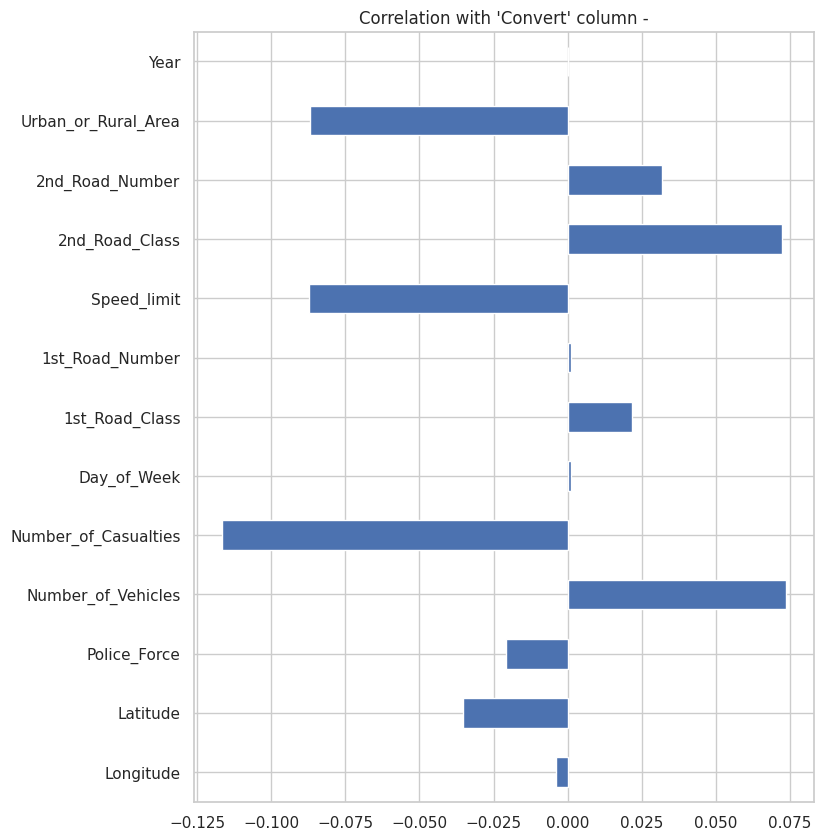

In [ ]:
X = df.drop(columns=['Accident_Severity'], axis=1)

plt.figure(figsize=(8, 10))
X.corrwith(df['Accident_Severity']).plot(kind='barh',
                               title="Correlation with 'Convert' column -")
plt.show()

The Feature Accident Severity is highly correlated with the feature like "Number of Vehicles", "Number of casuality" and "Speed Limit".

#Feature Engineering and Scaling

In [ ]:
cat_cols=[feature for feature in df.columns if df[feature].dtype=='O']
print(cat_cols)

['Road_Type', 'Junction_Control', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Did_Police_Officer_Attend_Scene_of_Accident']


In [ ]:
for feature in cat_cols:
    print(f'The {feature} has following number of {len(df[feature].unique())}')

The Road_Type has following number of 6
The Junction_Control has following number of 5
The Pedestrian_Crossing-Human_Control has following number of 3
The Pedestrian_Crossing-Physical_Facilities has following number of 6
The Light_Conditions has following number of 5
The Weather_Conditions has following number of 9
The Road_Surface_Conditions has following number of 6
The Special_Conditions_at_Site has following number of 8
The Carriageway_Hazards has following number of 6
The Did_Police_Officer_Attend_Scene_of_Accident has following number of 2


Hence the catgorical variables have values ranging from 2 to 9, we can use LabelEncoder

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [ ]:
for feature in cat_cols:
    df[feature]=labelencoder.fit_transform(df[feature])

In [ ]:
df.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,-0.191170,51.489096,1,2,1,1,2005-04-01,3,2023-11-17 17:42:00,3.0,...,2,4,4,5,5,3,3,1.0,1,2005.0
1,-0.211708,51.520075,1,3,1,1,2005-05-01,4,2023-11-17 17:36:00,4.0,...,2,3,2,1,0,3,3,1.0,1,2005.0
2,-0.206458,51.525301,1,3,2,1,2005-06-01,5,2023-11-17 00:15:00,5.0,...,2,2,2,1,0,3,3,1.0,1,2005.0
3,-0.173862,51.482442,1,3,1,1,2005-07-01,6,2023-11-17 10:35:00,3.0,...,2,2,4,1,0,3,3,1.0,1,2005.0
4,-0.156618,51.495752,1,3,1,1,2005-10-01,2,2023-11-17 21:13:00,6.0,...,2,2,1,1,5,3,3,1.0,1,2005.0


In [ ]:
df.drop('Year',axis=1,inplace=True)

Converting the DateTime Variables to be feeded to the Model

In [ ]:
df["day"] = df['Date'].map(lambda x: x.day)
df["month"] = df['Date'].map(lambda x: x.month)
df["year"] = df['Date'].map(lambda x: x.year)

In [ ]:
df.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,day,month,year
0,-0.191170,51.489096,1,2,1,1,2005-04-01,3,2023-11-17 17:42:00,3.0,...,4,5,5,3,3,1.0,1,1,4,2005
1,-0.211708,51.520075,1,3,1,1,2005-05-01,4,2023-11-17 17:36:00,4.0,...,2,1,0,3,3,1.0,1,1,5,2005
2,-0.206458,51.525301,1,3,2,1,2005-06-01,5,2023-11-17 00:15:00,5.0,...,2,1,0,3,3,1.0,1,1,6,2005
3,-0.173862,51.482442,1,3,1,1,2005-07-01,6,2023-11-17 10:35:00,3.0,...,4,1,0,3,3,1.0,1,1,7,2005
4,-0.156618,51.495752,1,3,1,1,2005-10-01,2,2023-11-17 21:13:00,6.0,...,1,1,5,3,3,1.0,1,1,10,2005


In [ ]:
df.drop("Date",axis=1,inplace=True)
df.drop("Time",axis=1,inplace=True)

In [ ]:
df['Accident_Severity']=df['Accident_Severity'].map({1:0,2:1,3:2})

# Scaling the data

In [ ]:
dfnew=df[['Latitude','Longitude','day','month','1st_Road_Number','year','Day_of_Week','Accident_Severity']]

In [ ]:
df.columns

Index(['Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Control', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'day', 'month', 'year'],
      dtype='object')

In [ ]:
dfnew.head()

,Latitude,Longitude,day,month,1st_Road_Number,year,Day_of_Week,Accident_Severity
0,51.489096,-0.191170,1,4,3218.0,2005,3,1
1,51.520075,-0.211708,1,5,450.0,2005,4,2
2,51.525301,-0.206458,1,6,0.0,2005,5,2
3,51.482442,-0.173862,1,7,3220.0,2005,6,2
4,51.495752,-0.156618,1,10,0.0,2005,2,2


In [ ]:
from sklearn.preprocessing import StandardScaler
features = [feature for feature in dfnew.columns if feature!='Accident_Severity']
x = dfnew.iloc[0:50000, :-1]
y = dfnew.iloc[0:50000,[-1]]
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.pipeline import Pipeline
models={"LogisticRegression":LogisticRegression(),
        "DecisionTreeClassifier":DecisionTreeClassifier()
        }

In [ ]:
def modelAccuracy(models,x,y,scaleFlag):
    #train/Test
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
    acc_result={}
    for name,model in models.items():
        #pipeline
        #1.Transformer -> 2.Model
        if(scaleFlag==1):
            model_pipeline=Pipeline([('MinMaxScler',MinMaxScaler()),('model',model)])
        elif(scaleFlag==2):
             model_pipeline=Pipeline([('StandardScaler',StandardScaler()),('model',model)])
        else:
            model_pipeline=Pipeline([('model',model)])
        #training/testing on model pipeline
        model_fit=model_pipeline.fit(xtrain,ytrain)
        ypred=model_fit.predict(xtest)
        acc=accuracy_score(ytest,ypred)
        print("The Accuracy for ",name," is :",acc)
        acc_result[name]=acc
    return acc_result

In [ ]:
def bestModel(result):
    high=0
    for name,acc in result.items():
        if acc>high:
            high=acc
            model_name=name
    print("Best Model is ",model_name," with accuaracy =>",high)

In [ ]:
def bestParams(model,param,xtrain,ytrain):
    #cv
    cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3)
    grid_cv=GridSearchCV(estimator=model,param_grid=param,cv=cv,scoring="f1_weighted")
    res=grid_cv.fit(xtrain,ytrain)
    print("Best Parameters are ",res.best_params_)
    print("Best Accuracy is ",res.best_score_)

In [ ]:
bestParams

<function __main__.bestParams(model, param, xtrain, ytrain)>

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
acc=modelAccuracy(models,x,y,1)

The Accuracy for  LogisticRegression  is : 0.8751
The Accuracy for  DecisionTreeClassifier  is : 0.7614


In [ ]:
bestModel(acc)

Best Model is  LogisticRegression  with accuaracy => 0.8751


Using SMOTE to Treat imbalenced Dataset

In [ ]:
%%time
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


from imblearn.over_sampling import SMOTE
oversample = RandomOverSampler()
x, y = oversample.fit_resample(x, y)

CPU times: user 116 ms, sys: 20.1 ms, total: 136 ms
Wall time: 281 ms


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
x_test

array([[-0.82016568,  0.99415701,  0.84984794, ..., -0.44228384,
         0.        ,  0.9790191 ],
       [-0.90341127,  0.87899083,  0.15798655, ..., -0.48453891,
         0.        ,  1.49944729],
       [-1.03482165,  0.8523943 ,  0.04267632, ...,  0.80071966,
         0.        , -1.62312185],
       ...,
       [-0.82856922,  1.17032862, -0.99511577, ..., -0.50097144,
         0.        , -1.62312185],
       [ 0.97010011, -0.81348734, -0.76449531, ..., -0.50801396,
         0.        ,  0.9790191 ],
       [-0.81043717,  0.96923326, -1.34104647, ...,  0.11114029,
         0.        ,  0.9790191 ]])

#Using Extra Tree Classifier for Prediction

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf.fit(x_train, y_train)

ExtraTreesClassifier()

In [ ]:
preds=clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_test,preds)
print(score)

0.9852692956882001


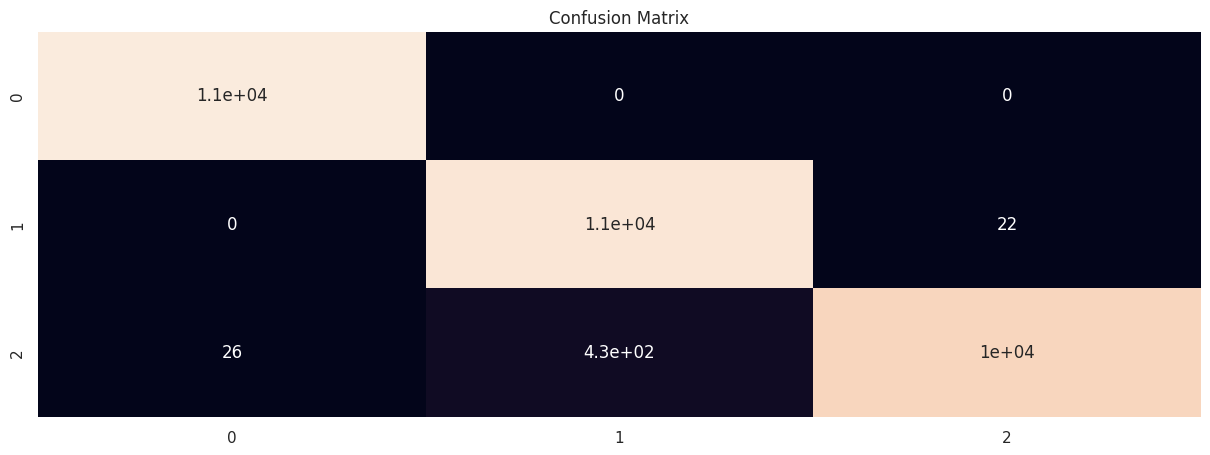

In [ ]:
fig = plt.figure(figsize=(15,5))
conmat = confusion_matrix(y_test, preds)
sns.heatmap(conmat, annot=True, cbar=False)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10949
           1       0.96      1.00      0.98     10840
           2       1.00      0.96      0.98     10796

    accuracy                           0.99     32585
   macro avg       0.99      0.99      0.99     32585
weighted avg       0.99      0.99      0.99     32585

